<a href="https://colab.research.google.com/github/Buthainah-sh/IT326-Olympics/blob/main/FinalReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problem

Athletic performance in the Olympics represents the pinnacle of global sports competition. Athletes strive to win medals and bring pride to their nations, making it crucial to understand the factors that contribute to their success. This includes studying the impact of demographic factors such as age and gender, as well as physical attributes like height and weight.  

Analyzing athletic performance is essential for improving training programs, developing better athlete selection processes, and enhancing preparation strategies. By examining these factors, we aim to uncover patterns that help athletes and teams improve their performance in future competitions.

# 2. Data Mining Task
Data mining plays a crucial role in analyzing athletic performance in the Olympics using both classification and clustering techniques. By applying algorithms to datasets containing attributes such as age, gender, height, weight, sport, and team representation, significant patterns can be discovered. In classification, data mining helps categorize athletes into groups like "Gold Medal", "Silver Medal", "Bronze Medal" based on their characteristics, which helps identify athletes with a higher chance of winning. On the other hand, clustering techniques group athletes who share similar traits, contributing to exploring factors that affect performance. Using this approach, athlete selection, training strategies, and valuable insights can be improved to enhance team performance in future competitions.

# 3. Data
## 3.1 Dataset:
The dataset was obtained from Kaggle: (https://www.kaggle.com/datasets/bhanupratapbiswas/olympic-data)

## 3.2 Genral info about the dataset:
The dataset consists of 11 attributes and the number of objects is 70000, these attributes contribute in determining the winner of medals in olympics. the class label for our dataset is type of medals won by atheletes that took three values 0, 1 and 2 as for Bronze, Silver and Gold in the same order.


In [ ]:
import pandas as pd
df = pd.read_csv('dataset_olympics.csv')

In [ ]:
# Display the attribute (column) names
print("Attribute names:\n", df.columns)

Attribute names:
 Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Display the data types of each column
print("\nData types:\n", df.dtypes)


Data types:
 ID         object
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year      float64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object



##3.3 Attribute Construction:

Attribute construction is the process of creating new features or variables from existing data to enhance the performance of machine learning models. This involves transforming, combining, or deriving new attributes that capture relevant information, thereby improving the model's ability to learn patterns and make predictions.

In [ ]:
#make a new column for bmi
df['Height'] = df['Height'] / 100
df['BMI'] = df['Weight'] / (df['Height'] ** 2)
print(df[['Height', 'Weight','Sex','BMI']].head(10))

   Height  Weight  Sex        BMI
0    1.80    80.0    M  24.691358
1    1.70    60.0    M  20.761246
2     NaN     NaN    M        NaN
3     NaN     NaN    M        NaN
4    1.85    82.0    F  23.959094
5     NaN     NaN  NaN        NaN
6    1.85    82.0    F  23.959094
7     NaN     NaN  NaN        NaN
8    1.85    82.0    F  23.959094
9     NaN     NaN  NaN        NaN


creating a " *BMI*  " by combining " *weight* " and " *height* " to regulate the ratio between them, which makes more sense for the analysis instead of taking each one on its own, which could effect the accuracy of the results.

## 3.4 Summary of Raw Data


Raw data, is unprocessed information collected from various sources that has not yet been analyzed or organized. It includes original data points that may need cleaning or processing before useful insights can be drawn.

### 3.4.1 Displaying raw data

In [ ]:
summary = df.describe(include='all')

# Print the summary
print("Summary of the dataset:")
print(summary)

Summary of the dataset:
           ID                              Name    Sex           Age  \
count   70000                             47512  47512  45869.000000   
unique  47512                             25274      2           NaN   
top     21462  Oksana Aleksandrovna Chusovitina      M           NaN   
freq       29                                29  33363           NaN   
mean      NaN                               NaN    NaN     24.646907   
std       NaN                               NaN    NaN      5.363997   
min       NaN                               NaN    NaN     11.000000   
25%       NaN                               NaN    NaN     21.000000   
50%       NaN                               NaN    NaN     24.000000   
75%       NaN                               NaN    NaN     27.000000   
max       NaN                               NaN    NaN     71.000000   

              Height        Weight    Team    NOC        Games          Year  \
count   38024.000000  37712.000

The provided summary of the dataset illustrates the central tendency of all attributes before any data cleaning processes are applied. This initial summary reveals key statistics, such as counts, unique values, means, medians, and ranges, which help in understanding the distribution and characteristics of the data. Analyzing this summary is crucial for identifying missing values, outliers, and inconsistencies that may need to be addressed during the data cleaning phase.

### 3.4.2 Descriptive statistics for numeric values

Descriptive statistics for numeric values summarize and describe the main features of a dataset. Key measures include:

Mean: The average of all numeric values.
Median: The middle value when data is sorted.
Mode: The most frequently occurring value.
Standard Deviation: A measure of the data's variability or dispersion around the mean.
Range: The difference between the maximum and minimum values.

* **Mean** is the average of all numeric values.
*  **Median** is the middle value when data is sorted.
*  **Standard Deviation** is a measure of the data's variability or dispersion around the mean.
*   **Range** is the difference between the maximum and minimum values.




These statistics provide a quick overview of the data's central tendency, variability, and distribution.

**Summary statistics**

In [ ]:
print(df[['Age','Weight','Height', 'BMI']].describe())

                Age        Weight        Height           BMI
count  45869.000000  37712.000000  38024.000000  37390.000000
mean      24.646907     70.703635      1.753054     22.780489
std        5.363997     14.501656      0.107887      2.926327
min       11.000000     25.000000      1.270000     12.267562
25%       21.000000     60.000000      1.680000     20.957274
50%       24.000000     70.000000      1.750000     22.499637
75%       27.000000     80.000000      1.830000     24.158818
max       71.000000    170.000000      2.230000     50.762937


The summary statistics for the numeric attributes reveal the following insights:<br> Age: Ranges from 11 to 88 years, with a mean of approximately 25.64 years.<br> Weight: Varies from 25 kg to 214 kg, with an average weight of about 70.90 kg.<br> Height: Heights range from 1.27 m to 2.23 m, with a mean height of approximately 1.76 m.<br> BMI: The Body Mass Index ranges from 12.27 to 63.90, with an average of around 22.81.<br> These statistics indicate a diverse population in terms of age, weight, height, and BMI.

**Variance**

In [ ]:
var_values = df[['Age','Weight', 'Height', 'BMI']].var()
print('The variance for age, height, weight and BMI is: \n')
print(var_values)

The variance for age, height, weight and BMI is: 

Age        28.772463
Weight    210.298037
Height      0.011640
BMI         8.563389
dtype: float64


The variance provides insights into the data distribution:<BR>
Age: The variance is approximately 42.06, indicating a moderate spread of ages within the dataset.<BR>
Weight: With a variance of about 202.14, this suggests considerable variation in the weights of individuals.<BR>
Height: The variance is very low at 0.01, indicating that heights are relatively consistent among individuals.<BR>
BMI: The variance is approximately 8.64, suggesting some variability in Body Mass Index values.<BR>
Overall, these variance values illustrate the extent of variability in each attribute, highlighting the diversity of the dataset.

## 3.3 Graph

 a graph is a visual representation of data that displays relationships, patterns, or trends among variables. Graphs can take various forms, including:

* **Bar Graphs:** Show categorical data with rectangular bars.
* **Line Graphs:** Illustrate trends over time by connecting data points with lines.
* **Pie Charts:** Depict proportions of a whole using slices of a circle.
* **Scatter Plots:** Display individual data points to show relationships between two numeric variables.

Graphs are essential for interpreting complex data and communicating findings effectively.

**Bar graph**

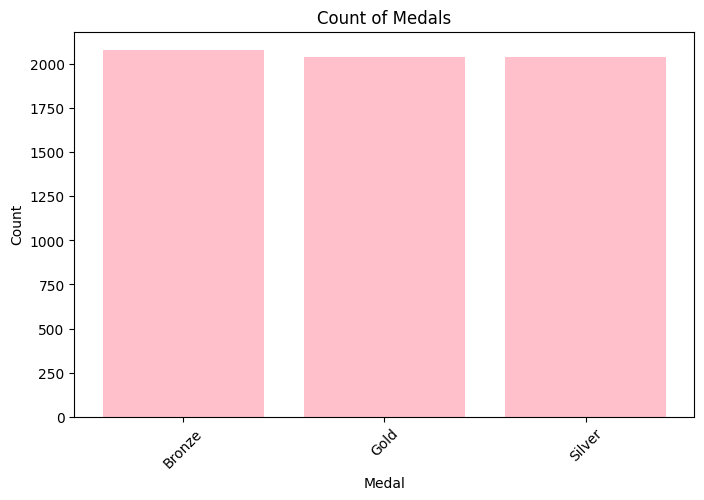

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

medal_counts = df['Medal'].value_counts()

# Create a bar chart using Matplotlib
plt.figure(figsize=(8, 5))
plt.bar(medal_counts.index, medal_counts.values, color='pink')
plt.title('Count of Medals')
plt.xlabel('Medal')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The bar chart above summarizes the medals won (Gold, Silver, Bronze) in the dataset, visualizing the frequency of each medal type for easy comparison and analysis.
The bars are nearly equal in height. This indicates that the dataset has an equal distribution of medal winning (any type of medal),This balanced dataset is a result of controlled sampling.

## 3.4 Variables Distribution

Variable distribution refers to how the values of a particular variable are spread or arranged across a dataset. It describes the frequency or probability of different outcomes for that variable and can reveal patterns, trends, and anomalies.

**Distribution of Numeric Variables**

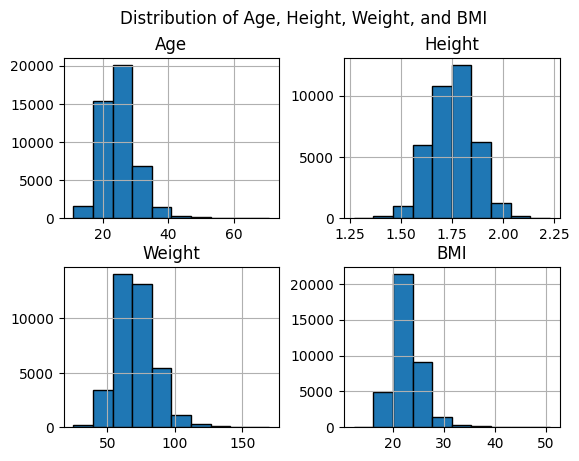

In [ ]:
import matplotlib.pyplot as plt

columns_to_plot = ['Age', 'Height', 'Weight', 'BMI']

df[columns_to_plot].hist(bins=10, edgecolor='black')

plt.suptitle('Distribution of Age, Height, Weight, and BMI')
plt.show()

 The histograms display how values for Age, Height, Weight, and BMI are distributed, helping to identify patterns, such as normality or skewness, in the data.

**Medal Distribution for top 20 countries**

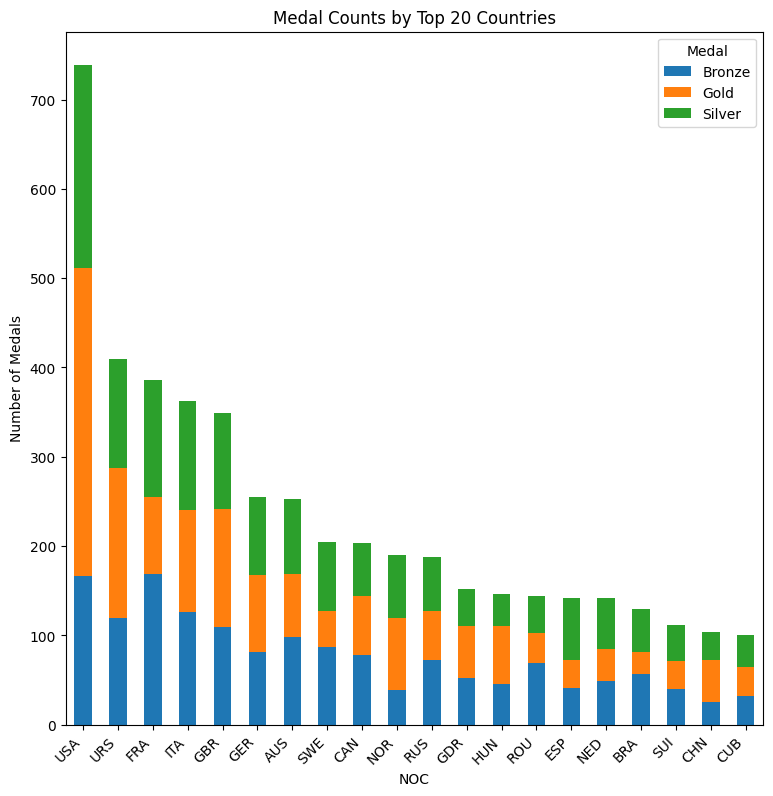

In [ ]:

# Group by NOC and count medals
medal_counts = df.groupby('NOC')['Medal'].value_counts().unstack().fillna(0)

# Sum the total medals for each country
total_medals = medal_counts.sum(axis=1)

# Get the top 20 countries by total medals
top_20_countries = total_medals.nlargest(20).index

# Filter the medal_counts DataFrame to include only the top 20 countries
top_20_medal_counts = medal_counts.loc[top_20_countries]

# Plot the bar chart
top_20_medal_counts.plot(kind='bar', stacked=True, figsize=(9, 9))
plt.title('Medal Counts by Top 20 Countries')
plt.xlabel('NOC')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45, ha='right')
plt.show()

The stacked bar chart displays the distribution of Gold, Silver, and Bronze medals for the top 20 countries, facilitating easy comparison of their performances.

**Top 20 countries winning gold medals**

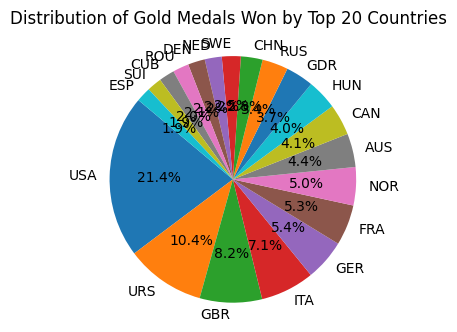

In [ ]:

gold_medals = df[df['Medal'] == 'Gold']
gold_medal_counts = gold_medals['NOC'].value_counts().nlargest(20)

import matplotlib.pyplot as plt

plt.figure(figsize=(3.5, 3.5))
plt.pie(gold_medal_counts, labels=gold_medal_counts.index, autopct='%1.1f%%', startangle=140)
plt.suptitle('Distribution of Gold Medals Won by Top 20 Countries')
plt.axis('equal')
plt.show()

The pie chart illustrates the distribution of Gold medals won by the top 20 countries, highlighting each country's share of the total Gold medals.

**Medal Distribution by Type for Top 10 Athletes**

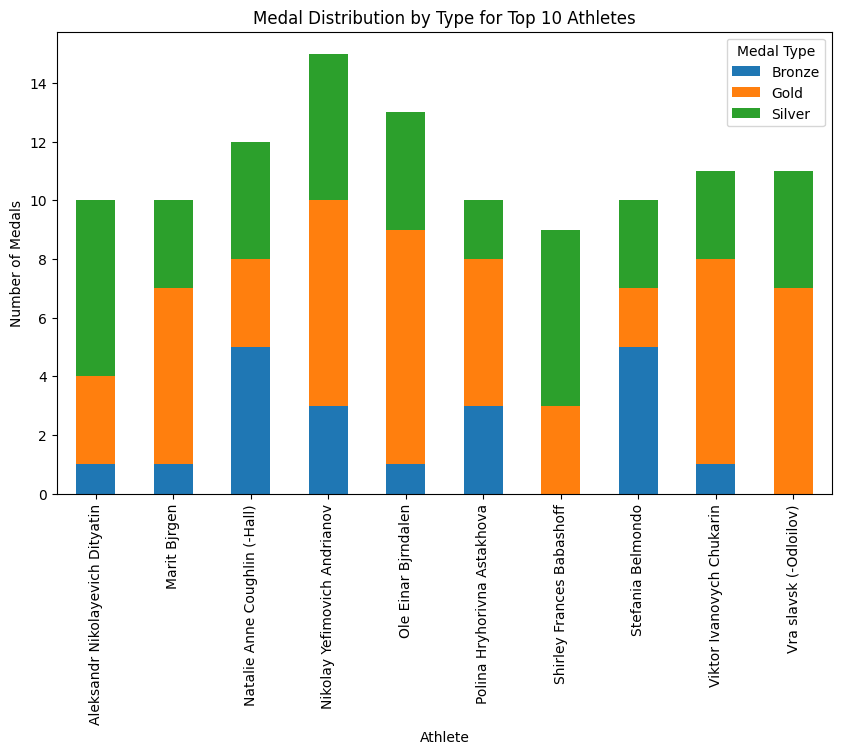

In [ ]:
#Top 10 atheletes
import matplotlib.pyplot as plt

# Filter the dataset for the top 10 athletes
top_athletes = df[df['Medal'].notna()]['Name'].value_counts().head(10).index
top_athletes_df = df[df['Name'].isin(top_athletes)]

# Create a pivot table to count the medals by type for each athlete
medals_by_type = top_athletes_df.pivot_table(index='Name', columns='Medal', aggfunc='size', fill_value=0)

medals_by_type.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Medal Distribution by Type for Top 10 Athletes')
plt.xlabel('Athlete')
plt.ylabel('Number of Medals')
plt.legend(title='Medal Type')
plt.show()

The stacked bar chart displays the distribution of medals (Gold, Silver, and Bronze) won by the top 10 athletes, allowing for easy comparison of their achievements.

**Top 1000 atheletes and their BMI**

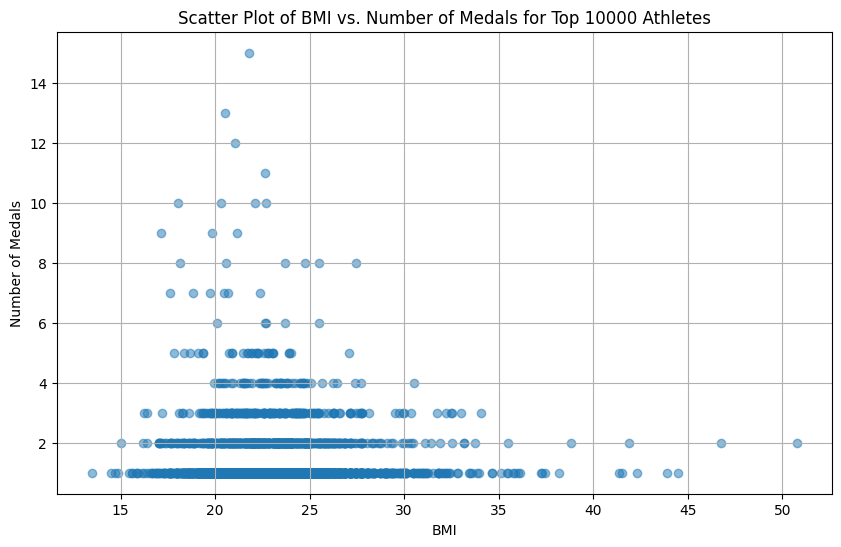

In [ ]:
# Filter the dataset for the top 10000 athletes
top_athletes = df[df['Medal'].notna()]['Name'].value_counts().head(10000).index
top_athletes_df = df[df['Name'].isin(top_athletes)]

# Create a DataFrame to store the number of medals and BMI for each top athlete
athlete_bmi_medals = top_athletes_df.groupby('Name').agg({
    'BMI': 'mean',  # Average BMI for each athlete
    'Medal': 'count'  # Total number of medals for each athlete
}).reset_index()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(athlete_bmi_medals['BMI'], athlete_bmi_medals['Medal'], alpha=0.5)

plt.title('Scatter Plot of BMI vs. Number of Medals for Top 10000 Athletes')
plt.xlabel('BMI')
plt.ylabel('Number of Medals')
plt.grid(True)
plt.show()

This Scatter plot is displaying the distribution of Body Mass Index (BMI) across different medal types won by athletes, providing insights into the relationship between BMI and athletic performance.

**BMI distribution for athletes by medal type**

In [ ]:
%pip install seaborn

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI', y='Medal', data=df)
plt.title('Box Plot of BMI by Medal Type of Athletes')
plt.xlabel('BMI')
plt.ylabel('Medal Type')

# Manually create the legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, title='Medal Type')

plt.show()

NameError: name 'df' is not defined

<Figure size 1000x600 with 0 Axes>

The box plot displays the BMI distribution for athletes by medal type. Each box shows the interquartile range, with the median BMI marked inside. Whiskers extend to the minimum and maximum values, while points beyond the whiskers indicate outliers. This visualization highlights BMI differences among athletes with various medal achievements.

#4. Data Preprocessing

We need to apply a few data preprocessing techniques in our dataset, like:

**Data Cleaning**
- **1. removing noise:** to keep the quality of the data high.
- **2. Handeling missing values:** for better outcome when analysing the data.

**Data transformation**
- **1. Categorical data encoding:** so the machine could understand the values and we could perform certain calculations.
- **2. Normalize Data:** to ensure consistent data scale.
- **3. Discretization:** converts continuous time values into specific categories.
- **4. Feature Selection:** to determine the relative importance of each feature in a dataset when building a predictive model.

The current (raw) dataset will be shown below, as for the preprocessed dataset, it will be shown after applying these preprocessing techniques.

In [ ]:
import pandas as pd
print(pd.read_csv('dataset_olympics.csv')

                                                      ID  \
0                                                      1   
1                                                      2   
2                                                      3   
3                                                      4   
4                                                      5   
...                                                  ...   
69995                                              35656   
69996                                              35656   
69997  35657,"David Thomas ""Dave"" Fitzsimons",M,26....   
69998  35657,"David Thomas ""Dave"" Fitzsimons",M,30....   
69999                                              35658   

                           Name  Sex   Age  Height  Weight            Team  \
0                     A Dijiang    M  24.0   180.0    80.0           China   
1                      A Lamusi    M  23.0   170.0    60.0           China   
2           Gunnar Nielsen Aaby    M  24.0   


First, we need to remove rows that has no medal(no class label) before attempting to handle missing values, because the results will be far from true otherwise.

## 4.1 Data Cleaning

## 4.1.1 Remove noise
Noisy data are data that contains errors, outliers, missing values, or inconsistencies that can affect
the quality and reliability of your analysis.
We want to remove the noisy data, first by removing unnecessary columns, removing rows that has missing columns,  as well as outliers detection and removal.

**Delete unnecessary columns**

We will remove the rows "Weight","Height" and "Team", considering the newly added BMI column to be derived from "Weight" and "Height", thus, they
are not needed anymore, and it is better to remove them alongside the "Team" column because our study is focused on predicting medal outcomes, and using the column "NOC" will be enough.

In [ ]:
import pandas as pd
df.drop(columns=["Height", "Weight","Team"], inplace=True)

**Delete unnecessary rows**

We will remove the rows that has the value of "Year" set to 1999 or less, because it will be considered outdated data.

In [ ]:
# Remove rows where 'Year' is 1999 or less
df = df[df['Year'] > 1999]
# Remove rows where the athelete did not win any medals.
df = df[df['Medal'].notna()]
# Display the cleaned DataFrame
print(df)

          ID                           Name Sex   Age  NOC        Games  \
40        16       Juhamatti Tapio Aaltonen   M  28.0  FIN  2014 Winter   
73        20             Kjetil Andr Aamodt   M  30.0  NOR  2002 Winter   
76        20             Kjetil Andr Aamodt   M  30.0  NOR  2002 Winter   
78        20             Kjetil Andr Aamodt   M  34.0  NOR  2006 Winter   
79        21      Ragnhild Margrethe Aamodt   F  27.0  NOR  2008 Summer   
...      ...                            ...  ..   ...  ...          ...   
69777  35539                   Sven Fischer   M  34.0  GER  2006 Winter   
69835  35565             Mardy Simpson Fish   M  22.0  USA  2004 Summer   
69912  35614                 Doris Fitschen   F  31.0  GER  2000 Summer   
69983  35651  Theresa Matauaina Fitzpatrick   F  21.0  NZL  2016 Summer   
69988  35653          Casey J. FitzRandolph   M  27.0  USA  2002 Winter   

         Year  Season            City          Sport  \
40     2014.0  Winter           Sochi     I

**Remove rows that have missing columns**

We will avoid removing rows that has the "Medal" missing, because it indicates that the player has not won any medal, and it is an essential information when it comes to our study, but we will remove other columns, using the subset parameter.

In [ ]:
import pandas as pd
# Drop rows with missing values, ignoring the 'Medal' column
df_cleaned = df.dropna(subset=["Name", "Sex", "Age","NOC","Games","Year","Season","City","Sport","Event","BMI"])
print("Dataframe after removing rows with missing data (ignoring the Medal column):")
print(df_cleaned)

Dataframe after removing rows with missing data (ignoring the Medal column):
          ID                           Name Sex   Age  NOC        Games  \
40        16       Juhamatti Tapio Aaltonen   M  28.0  FIN  2014 Winter   
73        20             Kjetil Andr Aamodt   M  30.0  NOR  2002 Winter   
76        20             Kjetil Andr Aamodt   M  30.0  NOR  2002 Winter   
78        20             Kjetil Andr Aamodt   M  34.0  NOR  2006 Winter   
158       62              Giovanni Abagnale   M  21.0  ITA  2016 Summer   
...      ...                            ...  ..   ...  ...          ...   
69777  35539                   Sven Fischer   M  34.0  GER  2006 Winter   
69835  35565             Mardy Simpson Fish   M  22.0  USA  2004 Summer   
69912  35614                 Doris Fitschen   F  31.0  GER  2000 Summer   
69983  35651  Theresa Matauaina Fitzpatrick   F  21.0  NZL  2016 Summer   
69988  35653          Casey J. FitzRandolph   M  27.0  USA  2002 Winter   

         Year  Season 

**Detect outliers and remove them**

we will use the Z score to detect the outliers in our numerical data ("BMI" and "Age"), after that, we will remove the outliers from the dataframe.

the Z score is a statistical measure that indicates how many standard deviations a data point is away from the mean.

In [ ]:
import pandas as pd
from scipy import stats

# Z-score calculation for Age and BMI
z_scores_age = stats.zscore(df["Age"])
z_scores_bmi = stats.zscore(df["BMI"])

# Set a threshold for Z-score (3 standard deviations)
threshold = 3

# Identify outliers based on Z-score
outliers_age = df[abs(z_scores_age) > threshold]
outliers_bmi = df[abs(z_scores_bmi) > threshold]

print("Outliers in Age:")
print(outliers_age)

print("Outliers in BMI:")
print(outliers_bmi)

Outliers in Age:
          ID                                    Name Sex   Age  NOC  \
3223    1809  Nasser Salih Nasser Abdullah Al-Attiya   M  41.0  QAT   
3304    1858                       Fehaid Al-Deehani   M  45.0  KUW   
3306    1858                       Fehaid Al-Deehani   M  49.0  IOA   
3680    2112                     Abdullah Al-Rashidi   M  52.0  IOA   
4632    2639                  Hans Daniel Alfredsson   M  41.0  SWE   
9417    5167         Kristin Ann Armstrong (-Savola)   F  42.0  USA   
13008   7075                           Glenys Bakker   F  43.0  CAN   
13911   7535                             Jesper Bank   M  43.0  DEN   
18955  10033                          Andrea Benelli   M  44.0  ITA   
20249  10680               Cheryl Bernard (Kullman-)   F  43.0  CAN   
32461  16685                   Kevin Lobdell Burnham   M  47.0  USA   
47393  24426                   Juan Esteban Curuchet   M  43.0  ARG   
48236  24860                  Dan Anders Hkan Dahlby   M  46

In [ ]:
import pandas as pd
# Filter the DataFrame, keeping only rows with Z-scores below the threshold
df_no_outliers = df[(abs(z_scores_age) < threshold) & (abs(z_scores_bmi) < threshold)]

print("DataFrame without outliers:")
print(df_no_outliers)

DataFrame without outliers:
Empty DataFrame
Columns: [ID, Name, Sex, Age, NOC, Games, Year, Season, City, Sport, Event, Medal, BMI]
Index: []


## 4.1.2 Missing Values

In [ ]:
# Calculate missing values for all columns
missing_values = df.isna().sum()

# Print missing values for each column
print('Missing values in each column:')
print(missing_values)

# Print the total number of missing values
print('\nTotal number of missing values:', missing_values.sum())

Missing values in each column:
ID         0
Name       0
Sex        0
Age        0
NOC        0
Games      0
Year       0
Season     0
City       0
Sport      0
Event      0
Medal      0
BMI       16
dtype: int64

Total number of missing values: 16


In total, there are 113,875 missing values across all columns. This high number of missing entries may impact data analysis and interpretation, emphasizing the need for data cleaning and imputation strategies to handle these gaps effectively.

In [ ]:
# Print the first 10 rows before handeling missing values
print('First 10 rows before handeling the missing values\n')
print(df.head(10))

First 10 rows before handeling the missing values

     ID                                     Name Sex   Age  NOC        Games  \
40   16                 Juhamatti Tapio Aaltonen   M  28.0  FIN  2014 Winter   
73   20                       Kjetil Andr Aamodt   M  30.0  NOR  2002 Winter   
76   20                       Kjetil Andr Aamodt   M  30.0  NOR  2002 Winter   
78   20                       Kjetil Andr Aamodt   M  34.0  NOR  2006 Winter   
79   21                Ragnhild Margrethe Aamodt   F  27.0  NOR  2008 Summer   
158  62                        Giovanni Abagnale   M  21.0  ITA  2016 Summer   
161  65                        Patimat Abakarova   F  21.0  AZE  2016 Summer   
163  67  Mariya Vasilyevna Abakumova (-Tarabina)   F  22.0  RUS  2008 Summer   
173  73                                Luc Abalo   M  23.0  FRA  2008 Summer   
174  73                                Luc Abalo   M  27.0  FRA  2012 Summer   

       Year  Season            City          Sport  \
40   2014.0  W

The output shows the first 10 rows of the dataset before any missing values have been addressed.
The presence of NaN values, particularly in the Height, Weight, and Medal columns, which suggests that significant data gaps need to be filled.

### Handeling missing values

In [ ]:
# Display the DataFrame before filling
print('DataFrame before replacing missing values:')
print(df)

DataFrame before replacing missing values:
          ID                           Name Sex   Age  NOC        Games  \
40        16       Juhamatti Tapio Aaltonen   M  28.0  FIN  2014 Winter   
73        20             Kjetil Andr Aamodt   M  30.0  NOR  2002 Winter   
76        20             Kjetil Andr Aamodt   M  30.0  NOR  2002 Winter   
78        20             Kjetil Andr Aamodt   M  34.0  NOR  2006 Winter   
79        21      Ragnhild Margrethe Aamodt   F  27.0  NOR  2008 Summer   
...      ...                            ...  ..   ...  ...          ...   
69777  35539                   Sven Fischer   M  34.0  GER  2006 Winter   
69835  35565             Mardy Simpson Fish   M  22.0  USA  2004 Summer   
69912  35614                 Doris Fitschen   F  31.0  GER  2000 Summer   
69983  35651  Theresa Matauaina Fitzpatrick   F  21.0  NZL  2016 Summer   
69988  35653          Casey J. FitzRandolph   M  27.0  USA  2002 Winter   

         Year  Season            City          Sport  \


This output displays the DataFrame in its entirety before any missing values are filled. The structure is consistent with the previous output.
The overall shape of the DataFrame is confirmed to be 70,000 rows and 16 columns, illustrating the dataset's scale.

In [ ]:
#Handeling missing values
df['ID'] = df['ID'].fillna(-1)

# Fill missing values for numeric columns with their means
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill missing values for categorical columns with their modes
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [ ]:
# Print the first 10 rows after handeling missing values
print('First 10 rows after handeling the missing values\n')
print(df.head(10))

First 10 rows after handeling the missing values

     ID                                     Name Sex   Age  NOC        Games  \
40   16                 Juhamatti Tapio Aaltonen   M  28.0  FIN  2014 Winter   
73   20                       Kjetil Andr Aamodt   M  30.0  NOR  2002 Winter   
76   20                       Kjetil Andr Aamodt   M  30.0  NOR  2002 Winter   
78   20                       Kjetil Andr Aamodt   M  34.0  NOR  2006 Winter   
79   21                Ragnhild Margrethe Aamodt   F  27.0  NOR  2008 Summer   
158  62                        Giovanni Abagnale   M  21.0  ITA  2016 Summer   
161  65                        Patimat Abakarova   F  21.0  AZE  2016 Summer   
163  67  Mariya Vasilyevna Abakumova (-Tarabina)   F  22.0  RUS  2008 Summer   
173  73                                Luc Abalo   M  23.0  FRA  2008 Summer   
174  73                                Luc Abalo   M  27.0  FRA  2012 Summer   

       Year  Season            City          Sport  \
40   2014.0  Wi

After handling missing values, the DataFrame is now complete. The 'ID' column has -1 for any missing entries, while numeric columns are filled with their mean values. Categorical columns have been populated with the most frequent values, ensuring no missing data remains. This allows for a clean dataset ready for analysis

In [ ]:
# Display the DataFrame after filling
print('DataFrame after replacing missing values:')
print(df)

DataFrame after replacing missing values:
          ID                           Name Sex   Age  NOC        Games  \
40        16       Juhamatti Tapio Aaltonen   M  28.0  FIN  2014 Winter   
73        20             Kjetil Andr Aamodt   M  30.0  NOR  2002 Winter   
76        20             Kjetil Andr Aamodt   M  30.0  NOR  2002 Winter   
78        20             Kjetil Andr Aamodt   M  34.0  NOR  2006 Winter   
79        21      Ragnhild Margrethe Aamodt   F  27.0  NOR  2008 Summer   
...      ...                            ...  ..   ...  ...          ...   
69777  35539                   Sven Fischer   M  34.0  GER  2006 Winter   
69835  35565             Mardy Simpson Fish   M  22.0  USA  2004 Summer   
69912  35614                 Doris Fitschen   F  31.0  GER  2000 Summer   
69983  35651  Theresa Matauaina Fitzpatrick   F  21.0  NZL  2016 Summer   
69988  35653          Casey J. FitzRandolph   M  27.0  USA  2002 Winter   

         Year  Season            City          Sport  \
4

The output displays the DataFrame after filling in the missing values. <br>
Each column is complete, with no null entries. Numeric columns show updated values reflecting their mean, while categorical columns display the most frequent values. This provides a comprehensive view of the cleaned dataset, ready for further analysis

### Check and delete duplicate rows.

Duplicate data can result in inaccurate information and a lack of data integrity. It can lead to incorrect calculations and decisions based on wrong data.

In [ ]:
import pandas as pd
# find duplicate rows
duplicate_rows = df.duplicated()
# print duplicate rows
print("Number of duplicate rows:", duplicate_rows.sum())
print("Duplicated rows:", [duplicate_rows])

Number of duplicate rows: 0
Duplicated rows: [40       False
73       False
76       False
78       False
79       False
         ...  
69777    False
69835    False
69912    False
69983    False
69988    False
Length: 2141, dtype: bool]


In [ ]:
import pandas as pd
# remove duplicate rows based on all columns
df.drop_duplicates(inplace=True)

## 4.2 Data transformation

## 4.2.1 Categorical data encoding

Since most of our dataframe is made of categorical data, it is best to encode these data to be easier for the machine to read, most machine learning algorithms require numerical input, so categorical variables must be converted to a numerical format.

We will Encode the columns with nominal categorical variables using [One-Hot Encoding] : **Sex, NOC, Games, Season, City, Sport, Event.**

We will use ordinal encoding for the **Medal** column, since the order has a meaning:

-Gold (highest)

-Silver

-Bronze(lowest)

**Medal encoding:**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Define the ordering for medals
medal_order = ['No Medal', 'Bronze', 'Silver', 'Gold']

# Initialize OrdinalEncoder with the defined order
encoder = OrdinalEncoder(categories=[medal_order])

# Fit and transform the Medal column
df['Medal'] = encoder.fit_transform(df[['Medal']])

print("DataFrame after Ordinal Encoding for Medal:")
print(df)

DataFrame after Ordinal Encoding for Medal:
          ID                           Name Sex   Age  NOC        Games  \
40        16       Juhamatti Tapio Aaltonen   M  28.0  FIN  2014 Winter   
73        20             Kjetil Andr Aamodt   M  30.0  NOR  2002 Winter   
76        20             Kjetil Andr Aamodt   M  30.0  NOR  2002 Winter   
78        20             Kjetil Andr Aamodt   M  34.0  NOR  2006 Winter   
79        21      Ragnhild Margrethe Aamodt   F  27.0  NOR  2008 Summer   
...      ...                            ...  ..   ...  ...          ...   
69777  35539                   Sven Fischer   M  34.0  GER  2006 Winter   
69835  35565             Mardy Simpson Fish   M  22.0  USA  2004 Summer   
69912  35614                 Doris Fitschen   F  31.0  GER  2000 Summer   
69983  35651  Theresa Matauaina Fitzpatrick   F  21.0  NZL  2016 Summer   
69988  35653          Casey J. FitzRandolph   M  27.0  USA  2002 Winter   

         Year  Season            City          Sport  \

 **Sex, NOC, Games, Season, City, Sport, Event Encoding:**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to specified columns
for column in ['Sex', 'NOC', 'Games', 'Season', 'City', 'Sport', 'Event']:
    df[column] = label_encoder.fit_transform(df[column])

print("DataFrame after Label Encoding:")
print(df)

DataFrame after Label Encoding:
          ID                           Name  Sex   Age  NOC  Games    Year  \
40        16       Juhamatti Tapio Aaltonen    1  28.0   28      7  2014.0   
73        20             Kjetil Andr Aamodt    1  30.0   61      1  2002.0   
76        20             Kjetil Andr Aamodt    1  30.0   61      1  2002.0   
78        20             Kjetil Andr Aamodt    1  34.0   61      3  2006.0   
79        21      Ragnhild Margrethe Aamodt    0  27.0   61      4  2008.0   
...      ...                            ...  ...   ...  ...    ...     ...   
69777  35539                   Sven Fischer    1  34.0   32      3  2006.0   
69835  35565             Mardy Simpson Fish    1  22.0   88      2  2004.0   
69912  35614                 Doris Fitschen    0  31.0   32      0  2000.0   
69983  35651  Theresa Matauaina Fitzpatrick    0  21.0   62      8  2016.0   
69988  35653          Casey J. FitzRandolph    1  27.0   88      1  2002.0   

       Season  City  Sport  Eve

## 4.2.2  using Min-Max Scaling:
Normalization was performed to ensure consistent data scale.
The normalization technique applied is max-min normalization. This technique scales specific attribute values to a specified range from 0 to 1.
The following attributes were selected for normalization: Age, Year, and BMI.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#Extract columns to normlize
columns_to_normalize = ['Age', 'BMI' , 'Year']
data_to_normalize=df[columns_to_normalize]

#Min-Max scaling for selected columns
minmax_scaler = MinMaxScaler()
normalized_data_minmax = minmax_scaler.fit_transform(df[columns_to_normalize])

#Replace the normlized values in the original DataFrame
df[columns_to_normalize] = normalized_data_minmax

print("Min-Max selected data:")
print(df)

Min-Max selected data:
          ID                           Name  Sex       Age  NOC  Games   Year  \
40        16       Juhamatti Tapio Aaltonen    1  0.351351   28      7  0.875   
73        20             Kjetil Andr Aamodt    1  0.405405   61      1  0.125   
76        20             Kjetil Andr Aamodt    1  0.405405   61      1  0.125   
78        20             Kjetil Andr Aamodt    1  0.513514   61      3  0.375   
79        21      Ragnhild Margrethe Aamodt    0  0.324324   61      4  0.500   
...      ...                            ...  ...       ...  ...    ...    ...   
69777  35539                   Sven Fischer    1  0.513514   32      3  0.375   
69835  35565             Mardy Simpson Fish    1  0.189189   88      2  0.250   
69912  35614                 Doris Fitschen    0  0.432432   32      0  0.000   
69983  35651  Theresa Matauaina Fitzpatrick    0  0.162162   62      8  1.000   
69988  35653          Casey J. FitzRandolph    1  0.324324   88      1  0.125   

    

## 4.2.3 Discretization
The process of "discretization" for the "year" column is an important tool for data analysis, as it converts continuous time values into specific categories.


In [ ]:
#discretization for a specific coulmn
column_to_discretize='Year'
num_bins=3

#perform discretization using the cut
df['discretized_'+ column_to_discretize]=pd.cut(df[column_to_discretize], bins=num_bins, labels=False)

#display columns
print("original DataFrame:")
print(df[['Year' , 'discretized_Year']])

original DataFrame:
        Year  discretized_Year
40     0.875                 2
73     0.125                 0
76     0.125                 0
78     0.375                 1
79     0.500                 1
...      ...               ...
69777  0.375                 1
69835  0.250                 0
69912  0.000                 0
69983  1.000                 2
69988  0.125                 0

[2141 rows x 2 columns]


## 4.2.4 Feature Selection

We will use 3 feature selection techniques:

**Variance Threshold**
to select the most important features for our model. By removing features with low variance, this method helps us focus on the variables that have more significant variability, it will improve our ability to analyze athletes performances.


In [ ]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

# Select only numerical features
X = df.select_dtypes(include=['float64', 'int64'])
y = df['Medal']

# Apply Variance Threshold
selector = VarianceThreshold(threshold=0.05)
X_new = selector.fit_transform(X)

# Display the selected features
selected_features = X.columns[selector.get_support()]  # Get selected feature names
print("\nSelected Features after Variance Threshold:")
print(selected_features)



Selected Features after Variance Threshold:
Index(['Sex', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event',
       'Medal', 'discretized_Year'],
      dtype='object')


**L1 Regularization** to pick the most important features for our model, by using Regularization, it will allow us to focus on the variables that have the strongest relationship with the outcome whether an athlete wins a gold, silver, or bronze medal.

In [ ]:
from sklearn.linear_model import Lasso

# Prepare the target variable
df['Medal'] = df['Medal'].fillna('None')

X = df.select_dtypes(include=['float64', 'int64'])

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

y = df['Medal']

y = pd.factorize(y)[0]  # Convert 'Medal' to numerical values

# Use L1 Regularization (LASSO) for feature selection
model = Lasso(alpha=0.1)
model.fit(X_imputed, y)

# Display the selected features
selected_features = X.columns[model.coef_ != 0]
print("Selected Features for L1 Regularization:", selected_features)



Selected Features for L1 Regularization: Index(['NOC', 'Event', 'Medal'], dtype='object')


**Recursive Feature Elimination (RFE)** in our feature selection process. This method removes the least important features, ensuring that our model retains only the most relevant information, which enhances its ability to predict which athletes are likely to win medals.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Fill missing 'Medal' values with 'None'
df['Medal'] = df['Medal'].fillna('None')

# Label encode categorical variables
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Medal'] = LabelEncoder().fit_transform(df['Medal'])

X = df.select_dtypes(include=['float64', 'int64'])

# Initialize the imputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = MinMaxScaler()
X_imputed_scaled = scaler.fit_transform(X_imputed)


y = df['Medal']

# Use RFE with Logistic Regression
model = LogisticRegression(max_iter=3000)
rfe = RFE(model, n_features_to_select=2)
X_new = rfe.fit_transform(X_imputed_scaled, y)

# Display the selected features
selected_features = [feature for feature, selected in zip(X.columns, rfe.support_) if selected]
print("Selected Features using RFE:", selected_features)

Selected Features using RFE: ['Event', 'Medal']


## 4.3 Preprocessed Data

After we have done our preprocessing techniques, we will save these changes and print them to see the difference between the raw and the preprocessed data.

In [ ]:
df.to_csv('preprocessed_data.csv', index=False)

In [ ]:
import pandas as pd

# Load the saved CSV file
df = pd.read_csv('preprocessed_data.csv')

# Print the dataset
print(df)


         ID                           Name  Sex       Age  NOC  Games   Year  \
0        16       Juhamatti Tapio Aaltonen    1  0.351351   28      7  0.875   
1        20             Kjetil Andr Aamodt    1  0.405405   61      1  0.125   
2        20             Kjetil Andr Aamodt    1  0.405405   61      1  0.125   
3        20             Kjetil Andr Aamodt    1  0.513514   61      3  0.375   
4        21      Ragnhild Margrethe Aamodt    0  0.324324   61      4  0.500   
...     ...                            ...  ...       ...  ...    ...    ...   
2136  35539                   Sven Fischer    1  0.513514   32      3  0.375   
2137  35565             Mardy Simpson Fish    1  0.189189   88      2  0.250   
2138  35614                 Doris Fitschen    0  0.432432   32      0  0.000   
2139  35651  Theresa Matauaina Fitzpatrick    0  0.162162   62      8  1.000   
2140  35653          Casey J. FitzRandolph    1  0.324324   88      1  0.125   

      Season  City  Sport  Event  Medal

# 5. Data Mining Technique

In this project, we used both supervised learning (Classification) and unsupervised learning (Clustering) techniques to analyze the Olympic medal data. The aim was to predict medal outcomes and uncover hidden patterns.

## Classification
 The goal here was to predict an athlete’s likelihood of winning a gold, silver, or bronze medal, with the target attribute (**Medal**).

We used two attribute selection measures to build the model: **Gini Index** and **Information Gain (Entropy)**.

To prepare the data, we divided it into training and testing sets, testing three different splits:
- 60% training / 40% testing
- 70% training / 30% testing
- 80% training / 20% testing

We then used the **Decision Trees** algorithm to classify the data based on these splits.

Lastly, performance was evaluated using:
- **Accuracy**: Overall correctness of the model.
- **Precision**: Correctly predicted positive results.
- **Recall**: Correctly predicted actual positive results.
- **F1-Score**: Harmonic mean of precision and recall.
- **Support**: Number of occurrences of each class.

Python Packages and Methods Used:
- **train_test_split** from `sklearn.model_selection`: for dataset splitting
- **DecisionTreeClassifier** from `sklearn.tree`: for training the model
- **plot_tree**: for visualizing the decision tree
- **accuracy_score**, **confusion_matrix**, and **classification_report** from `sklearn.metrics`: for model evaluation

## Clustering

We applied **K-Means clustering** to identify natural groupings in the dataset.

First, we removed the class label (Medal) and irrelevant attributes (ID and Name).

Then, we applied **K-Means clustering** with different values of K chosen randomlly.

To evaluate the clusters, we used:
- **WCSS (Within-Cluster Sum of Squares)**: Measures cluster compactness and selects the cluster with the smallest WCSS.
- **Silhouette Score**: Evaluates how similar each data point is to its cluster compared to other clusters.

Then, to determine the optimal number of clusters, we used:
- **Elbow Method**: Identifies the optimal K based on WCSS.
- **Average Silhouette Score**: The highest score indicates the best K.

Python Packages and Methods Used:
- **StandardScaler** from `sklearn.preprocessing`: for dataset standardization
- **KMeans** from `sklearn.cluster`: for clustering
- **fit_predict()** from `KMeans`: for model fitting and predicting cluster labels
- **silhouette_score** and **silhouette_samples** from `sklearn.metrics`: for clustering quality evaluation


### Summary:

- **In Classification**: We used **Decision Trees**, evaluated with **Gini Index** and **Entropy**, and assessed the model using accuracy, precision, recall, F1-score, and support.
  
- **In Clustering**: We used **K-Means clustering** to group the data, evaluating clustering quality using **WCSS** and silhouette scores, and determined the optimal number of clusters using the **Elbow method** and average silhouette scores.

This combination of supervised and unsupervised learning techniques enables a comprehensive analysis of the Olympic medal data, helping predict medal outcomes and uncover hidden patterns in the dataset.


# 6. Evaluation and Comparison

## 6.1 Classification

Classification is a supervised learning technique that uses labeled data to build a model capable of predicting the class of new, unseen data. It involves categorizing or classifying data objects into predefined classes or categories based on their features or attributes.

In this phase, we aim to classify the likelihood of winning a gold, silver, or bronze medal using two attribute selection measures: the **Gini Index** and **Information Gain (Entropy)**.

The target attribute is the **Medal** attribute.

We will exclude the **ID**, **Name** attributes, as they do not provide any meaningful contribution to predicting the target variable "**Medal**".

In [ ]:
X = df[['Sex','Age','NOC','Games','Year','Season','City','Sport', 'Event','BMI','discretized_Year']]
y = df['Medal']

We have set the X variable to be the features of the dataset, excluding the ID, and Name columns, and the Y variable to be the target column "Medal".

### Applying Classification:

In this phase, we will apply Decision Trees classification using the Gini Index and Information Gain (Entropy) as attribute selection measures. The classification will be performed using three different data splits:

* 60% training / 40% testing
* 70% training / 30% testing
* 80% training / 20% testing



### **Gini Index**
The Gini Index is a measure of how mixed or impure a dataset is. The Gini impurity ranges between 0 and 1, where 0 represents a pure dataset and 1 represents a completely impure dataset.

- In a pure dataset, all the samples belong to the same class or category.
- In an impure dataset, there is a mixture of different classes or categories.

In decision tree algorithms, a pure dataset is ideal because it can be easily split into subsets of the same class. An impure dataset, containing a mix of classes, is harder to split.

The key point is that attributes with a lower Gini index are preferred, as lower Gini impurity indicates a better feature for splitting the dataset.



#### 1. Data Partitioned into 60% training / 40% testing





Accuracy: 0.3949652777777778
Confusion Matrix:
 [[293  17  66]
 [283  59  49]
 [251  31 103]]
Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.78      0.49       376
           1       0.55      0.15      0.24       391
           2       0.47      0.27      0.34       385

    accuracy                           0.39      1152
   macro avg       0.46      0.40      0.36      1152
weighted avg       0.46      0.39      0.35      1152



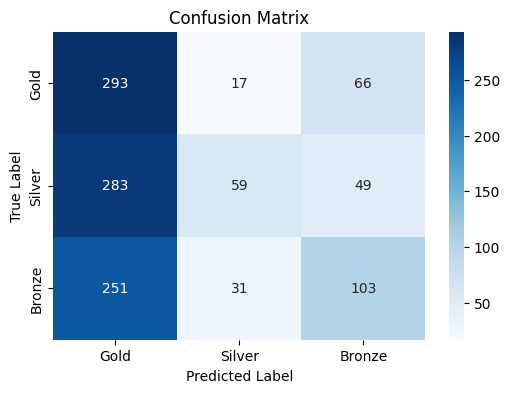

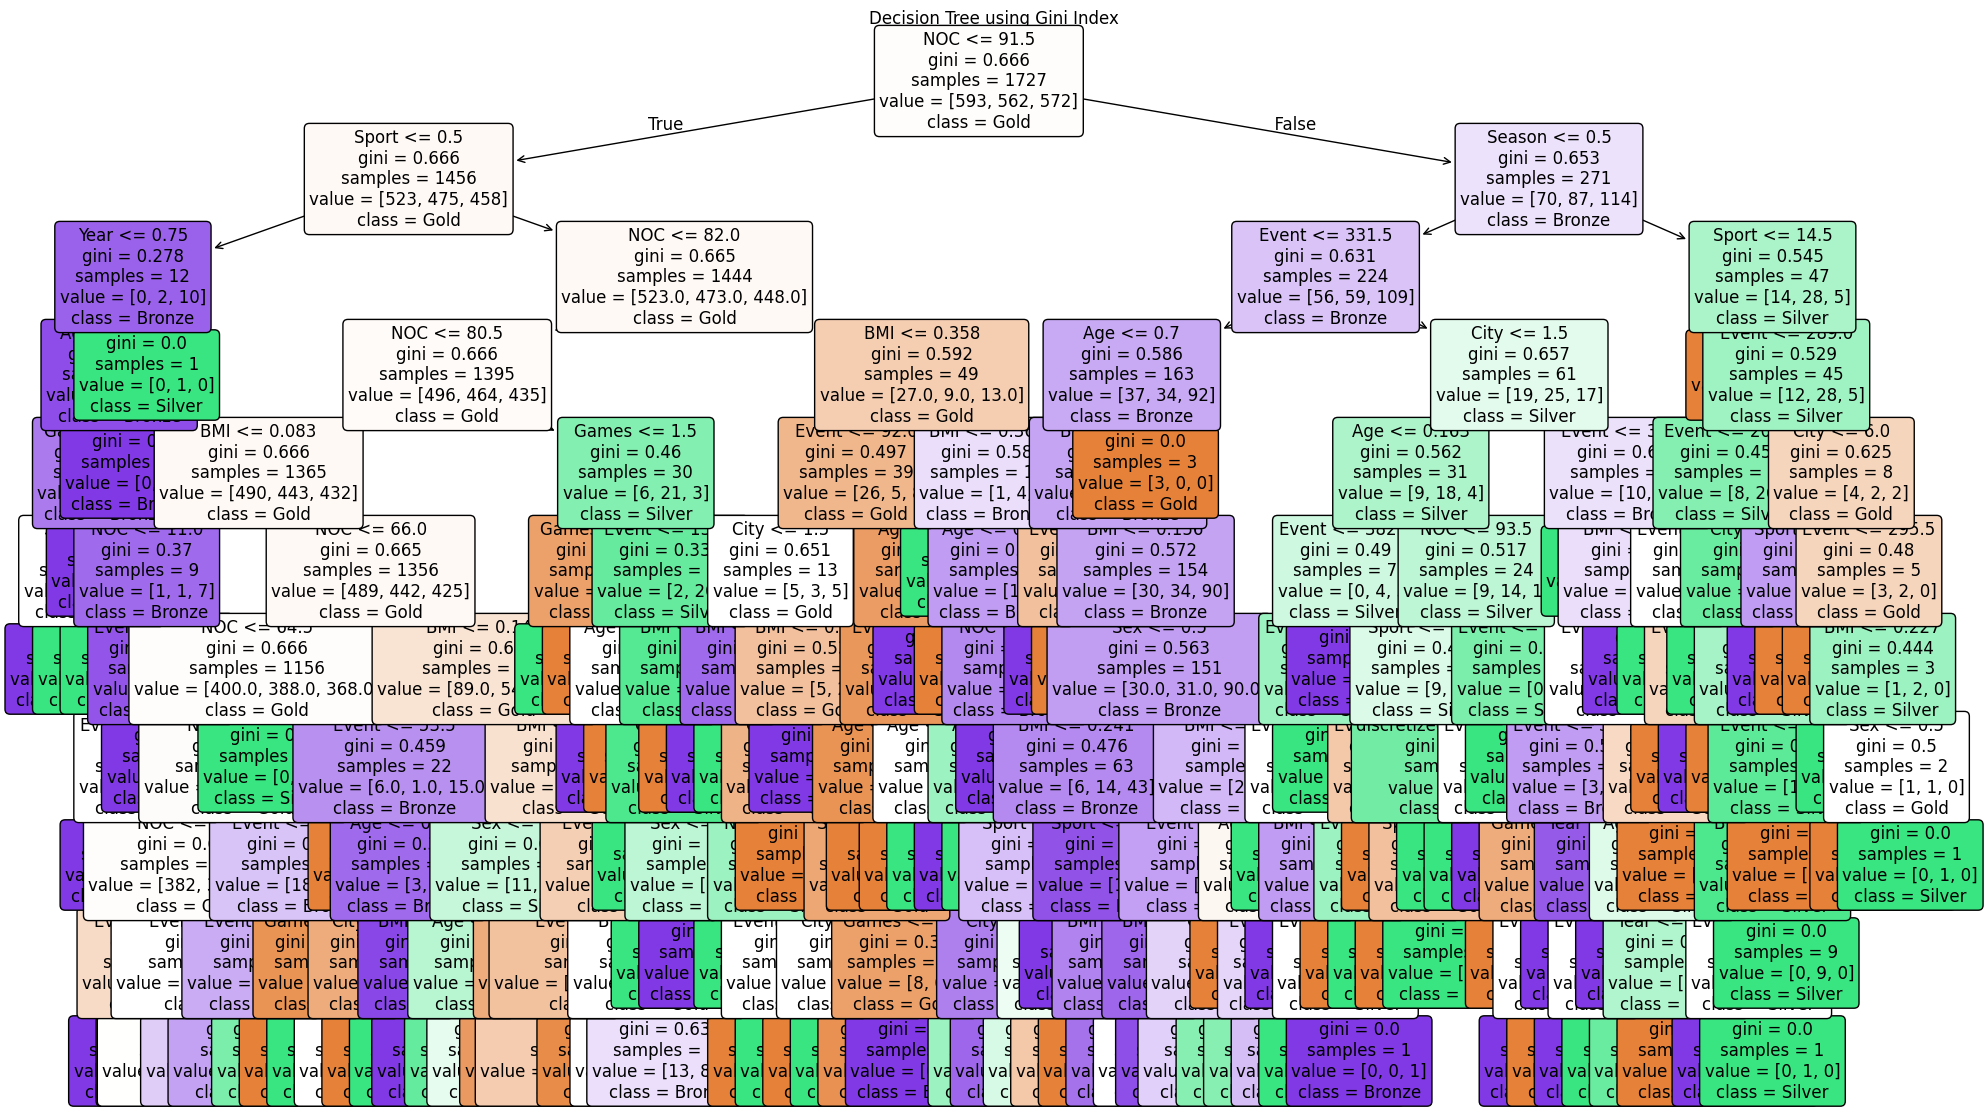

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#Splitting the data into 60% training / 40% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

#Training
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=10)
clf_gini.fit(X_train, y_train)

#Prediction
y_pred_gini = clf_gini.predict(X_test)

#Performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred_gini))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gini))
print("Classification Report:\n", classification_report(y_test, y_pred_gini))

#Confusion Matrix Figure
cm = confusion_matrix(y_test, y_pred_gini)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Gold', 'Silver', 'Bronze'], yticklabels=['Gold', 'Silver', 'Bronze'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#Decision Tree Figure
plt.figure(figsize=(24, 14))
plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=['Gold', 'Silver', 'Bronze'], rounded=True, fontsize=12)
plt.title('Decision Tree using Gini Index')
plt.show()


#### 2. Data Partitioned into 70% training / 30% testing

Accuracy: 0.40625
Confusion Matrix:
 [[159  37  80]
 [164  68  67]
 [129  36 124]]
Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.58      0.44       276
           1       0.48      0.23      0.31       299
           2       0.46      0.43      0.44       289

    accuracy                           0.41       864
   macro avg       0.43      0.41      0.40       864
weighted avg       0.43      0.41      0.39       864



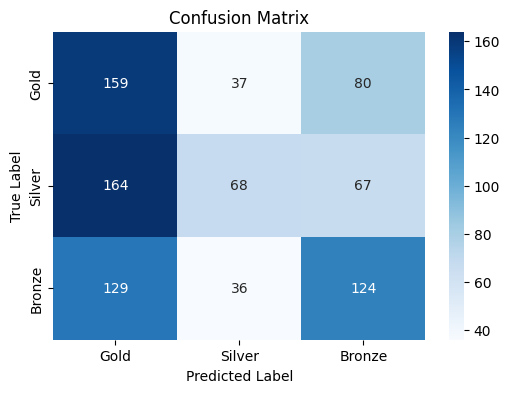

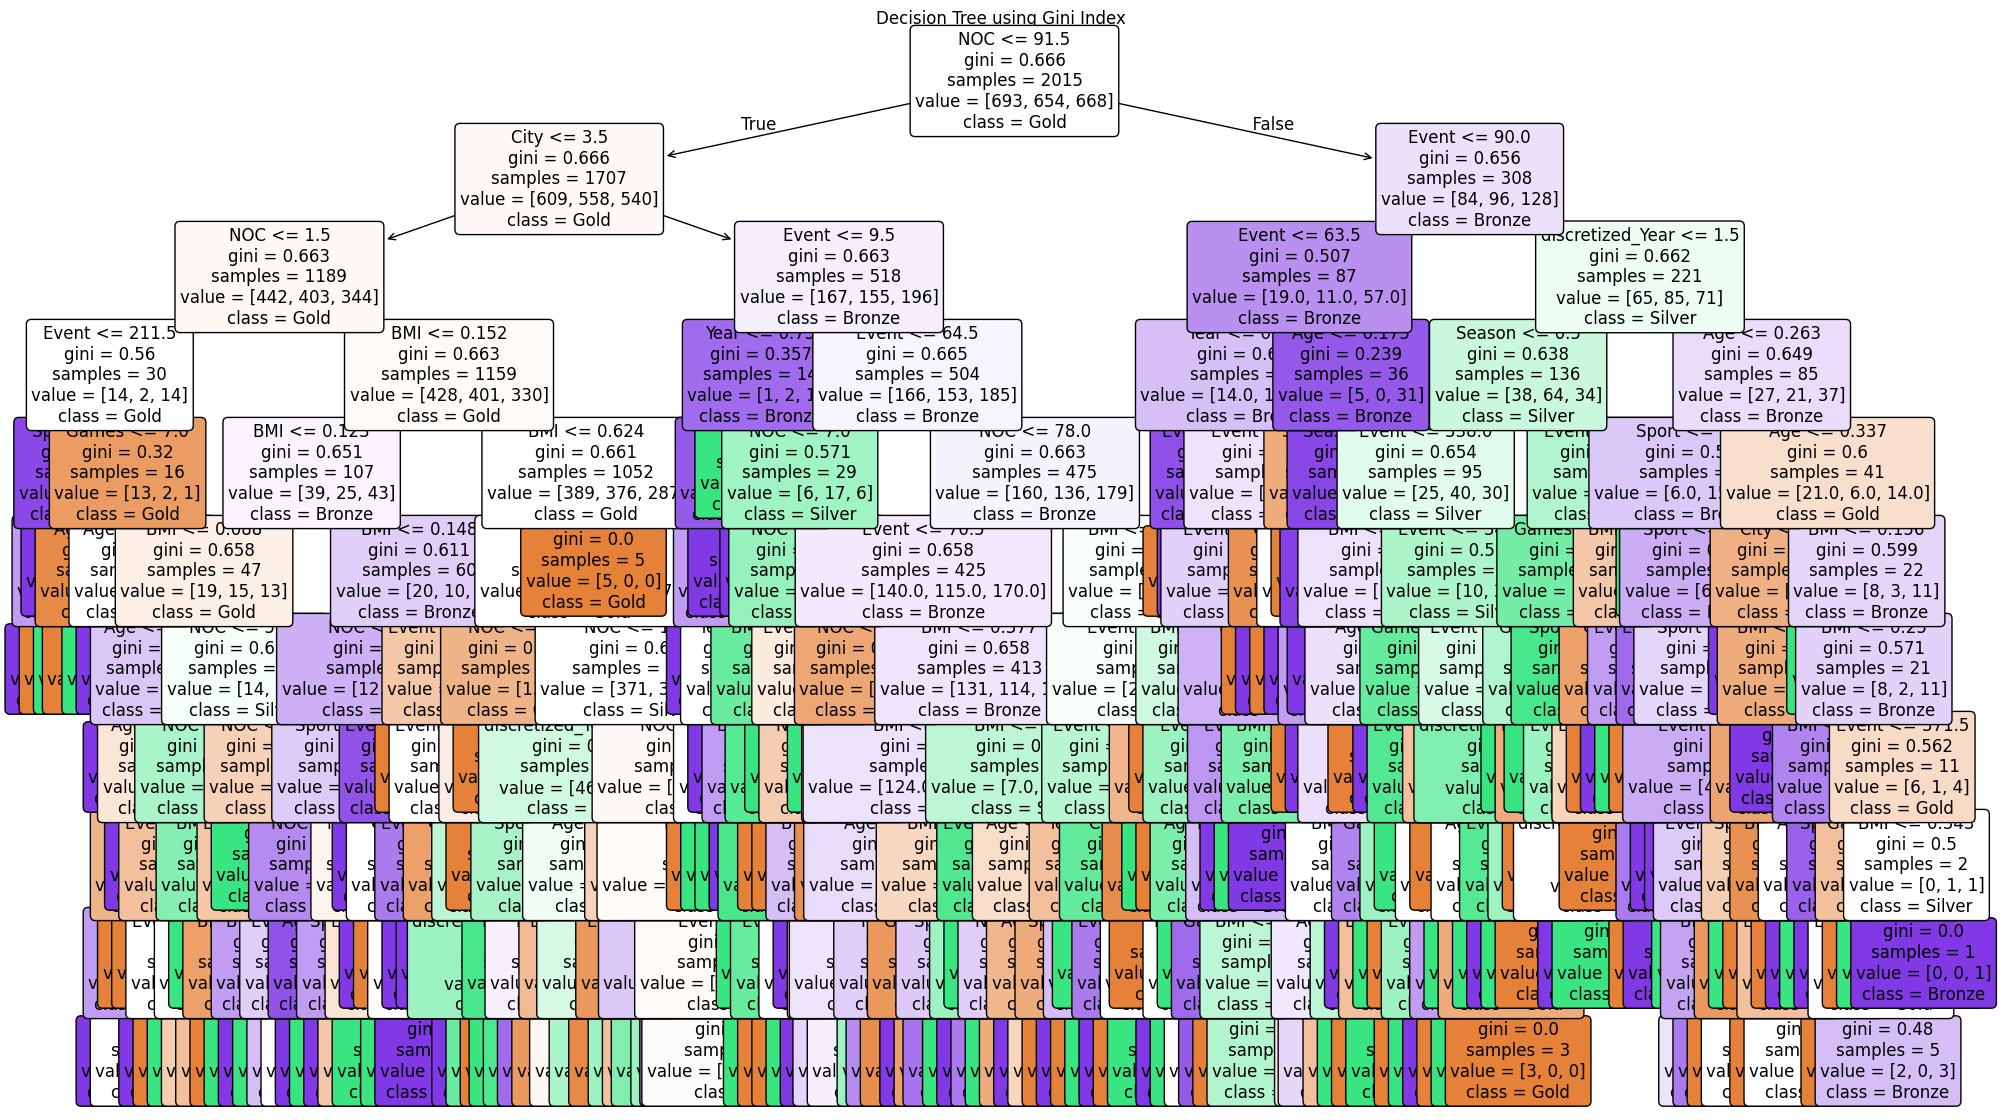

In [ ]:
#Splitting the data into 70% training / 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Training
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=10)
clf_gini.fit(X_train, y_train)

#Prediction
y_pred_gini = clf_gini.predict(X_test)

#Performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred_gini))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gini))
print("Classification Report:\n", classification_report(y_test, y_pred_gini))

#Confusion Matrix Figure
cm = confusion_matrix(y_test, y_pred_gini)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Gold', 'Silver', 'Bronze'], yticklabels=['Gold', 'Silver', 'Bronze'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#Decision Tree Figure
plt.figure(figsize=(24, 14))
plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=['Gold', 'Silver', 'Bronze'], rounded=True, fontsize=12)
plt.title('Decision Tree using Gini Index')
plt.show()


#### 3. Data Partitioned into 80% training / 20% testing


Accuracy: 0.4166666666666667
Confusion Matrix:
 [[ 36 107  40]
 [ 23 145  31]
 [ 35 100  59]]
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.20      0.26       183
           1       0.41      0.73      0.53       199
           2       0.45      0.30      0.36       194

    accuracy                           0.42       576
   macro avg       0.42      0.41      0.38       576
weighted avg       0.42      0.42      0.39       576



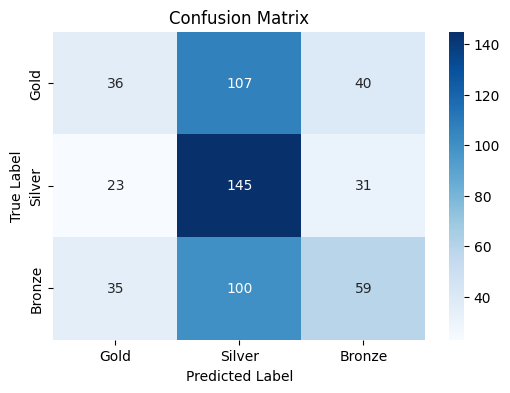

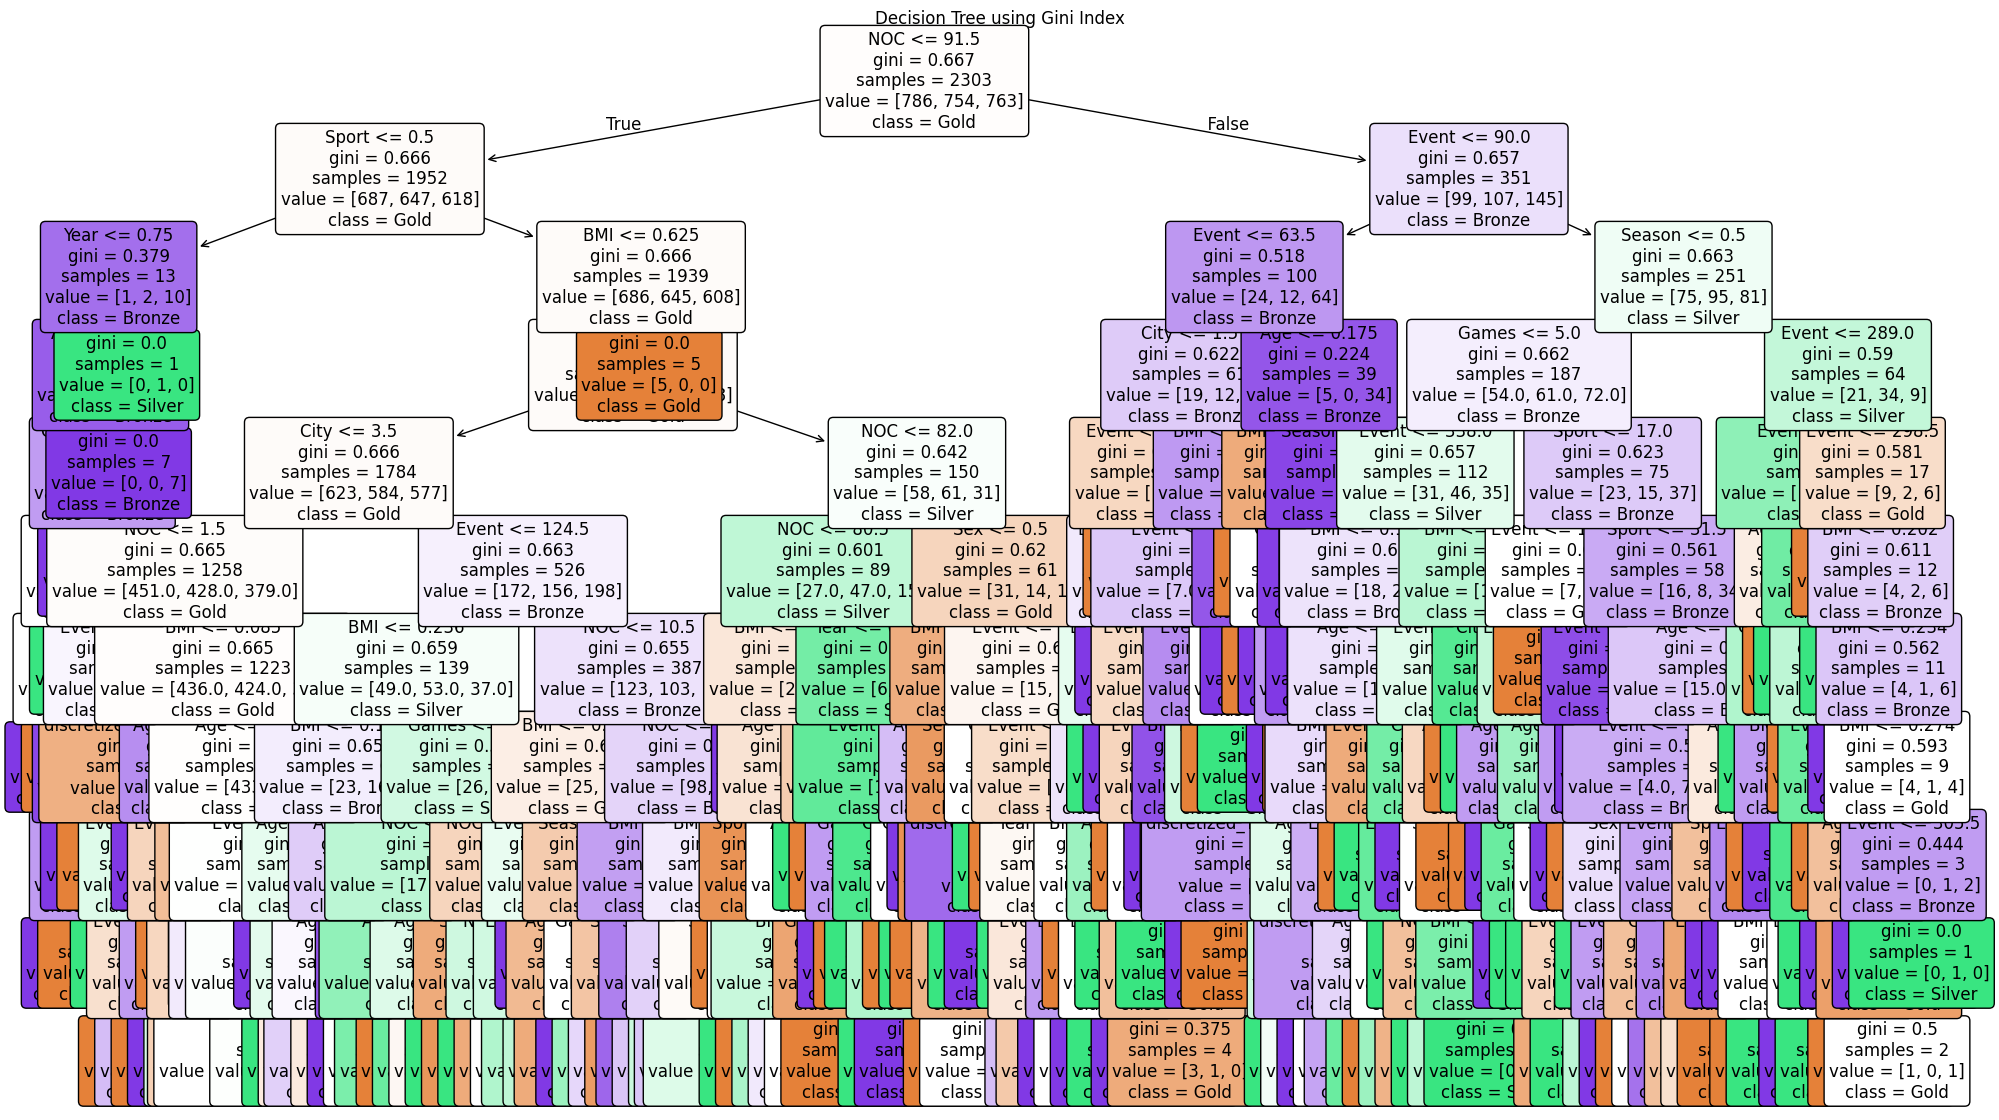

In [ ]:
#Splitting the data into 80% training / 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Training
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=10)
clf_gini.fit(X_train, y_train)

#Prediction
y_pred_gini = clf_gini.predict(X_test)

#Performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred_gini))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gini))
print("Classification Report:\n", classification_report(y_test, y_pred_gini))

#Confusion Matrix Figure
cm = confusion_matrix(y_test, y_pred_gini)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Gold', 'Silver', 'Bronze'], yticklabels=['Gold', 'Silver', 'Bronze'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#Decision Tree Figure
plt.figure(figsize=(24, 14))
plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=['Gold', 'Silver', 'Bronze'], rounded=True, fontsize=12)
plt.title('Decision Tree using Gini Index')
plt.show()

* **First Partition (60% training / 40% testing)**
 * Accuracy: 39.5%  
 * Recall: Class 0 (Gold) performs well in recall. However, recall for Classes 1 (Silver) and 2 (Bronze) is low, indicating room for improvement in detecting these classes.  
 * Precision: Class 1 (Silver) has the highest precision, followed by Class 2 (Bronze). Class 0 (Gold) shows lower precision, meaning the model occasionally misclassifies Gold instances.  
 * F1-Score: All classes have low F1-scores, suggesting that balancing recall and precision is a key area for improvement.



* **Second Partition (70% training / 30% testing)**
 * Accuracy: 40.6%  
 * Recall : Recall for Class 0 (Gold) has slightly decreased but remains good. Class 1 (Silver) continues to show low recall, while Class 2 (Bronze) has improved, though still needs further refinement.  
 * Precision: Class 0 (Gold) still has low precision, whereas Class 1 (Silver) shows a slight improvement in precision. Class 2 (Bronze) shows a better balance between precision and recall.  
 * F1-Score: F1-scores have improved for all classes, with Class 2 (Bronze) showing the most balanced performance, although further improvement is needed, particularly for Class 1 (Silver).

* **Third Partition (80% training / 20% testing)**
 * Accuracy: 41.67%  
 *Recall: Class 1 (Silver) has shown significant improvement in recall, now capturing most of the Silver instances. However, recall for Class 0 (Gold) has decreased, indicating the model is missing many Gold instances. Class 2 (Bronze) has seen only a slight improvement in recall.  
 * Precision: Class 1 (Silver) has relatively low precision despite the improved recall. Class 0 (Gold) maintains moderate precision. Class 2 (Bronze) shows improved precision, though it still struggles with recall.  
 * F1-Score: F1-scores have improved for all classes, with Class 1 (Silver) achieving the highest score, but further work is needed for better precision and balance across all classes. *italicized text*

 Based on the results, it is evident that increasing the size of the training partition leads to a slight improvement in model performance, particularly in accuracy, precision, and recall.

|                IG                |   60% training/40% testing   |   70% training/30% testing   |   80% training/20% testing   |
|----------------------------------|------------------------------|------------------------------|------------------------------|
| Accuracy                        | 39.5%                        | 40.6%                        | 41.67%                       |
| Confusion Matrix                | [[293  17  66] <br> [283  59  49] <br> [251  31 103]] | [[159  37  80] <br> [164  68  67] <br> [129  36 124]] | [[ 36 107  40] <br> [ 23 145  31] <br> [ 35 100  59]] |


### **Information Gain (Entropy)**
Entropy is a measure of uncertainty or disorder in a dataset. It helps us understand how mixed or impure the data is


**Range:** Entropy values range from 0 to 1.



*  0 means the dataset is pure (all samples belong to the same class).
*  1 means the dataset is completely mixed (samples are evenly distributed among different classes).

Entropy helps us gauge how mixed a dataset is, and lower entropy is better for making accurate predictions in decision tree models. Its sensitivity to class distribution allows for more nuanced decision-making in creating splits.




#### 1. Data Partitioned into 60% training / 40% testing

Accuracy: 0.4157986111111111
Confusion Matrix:
 [[172 129  75]
 [158 165  68]
 [147  96 142]]
Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.46      0.40       376
           1       0.42      0.42      0.42       391
           2       0.50      0.37      0.42       385

    accuracy                           0.42      1152
   macro avg       0.43      0.42      0.42      1152
weighted avg       0.43      0.42      0.42      1152



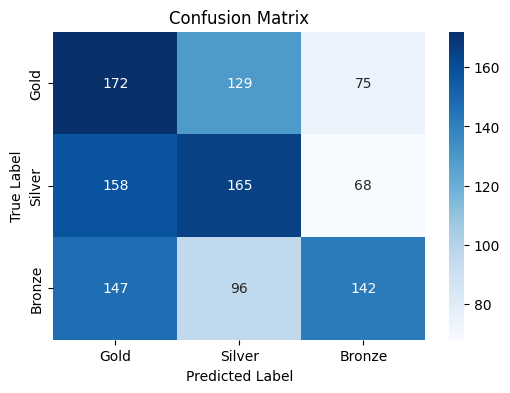

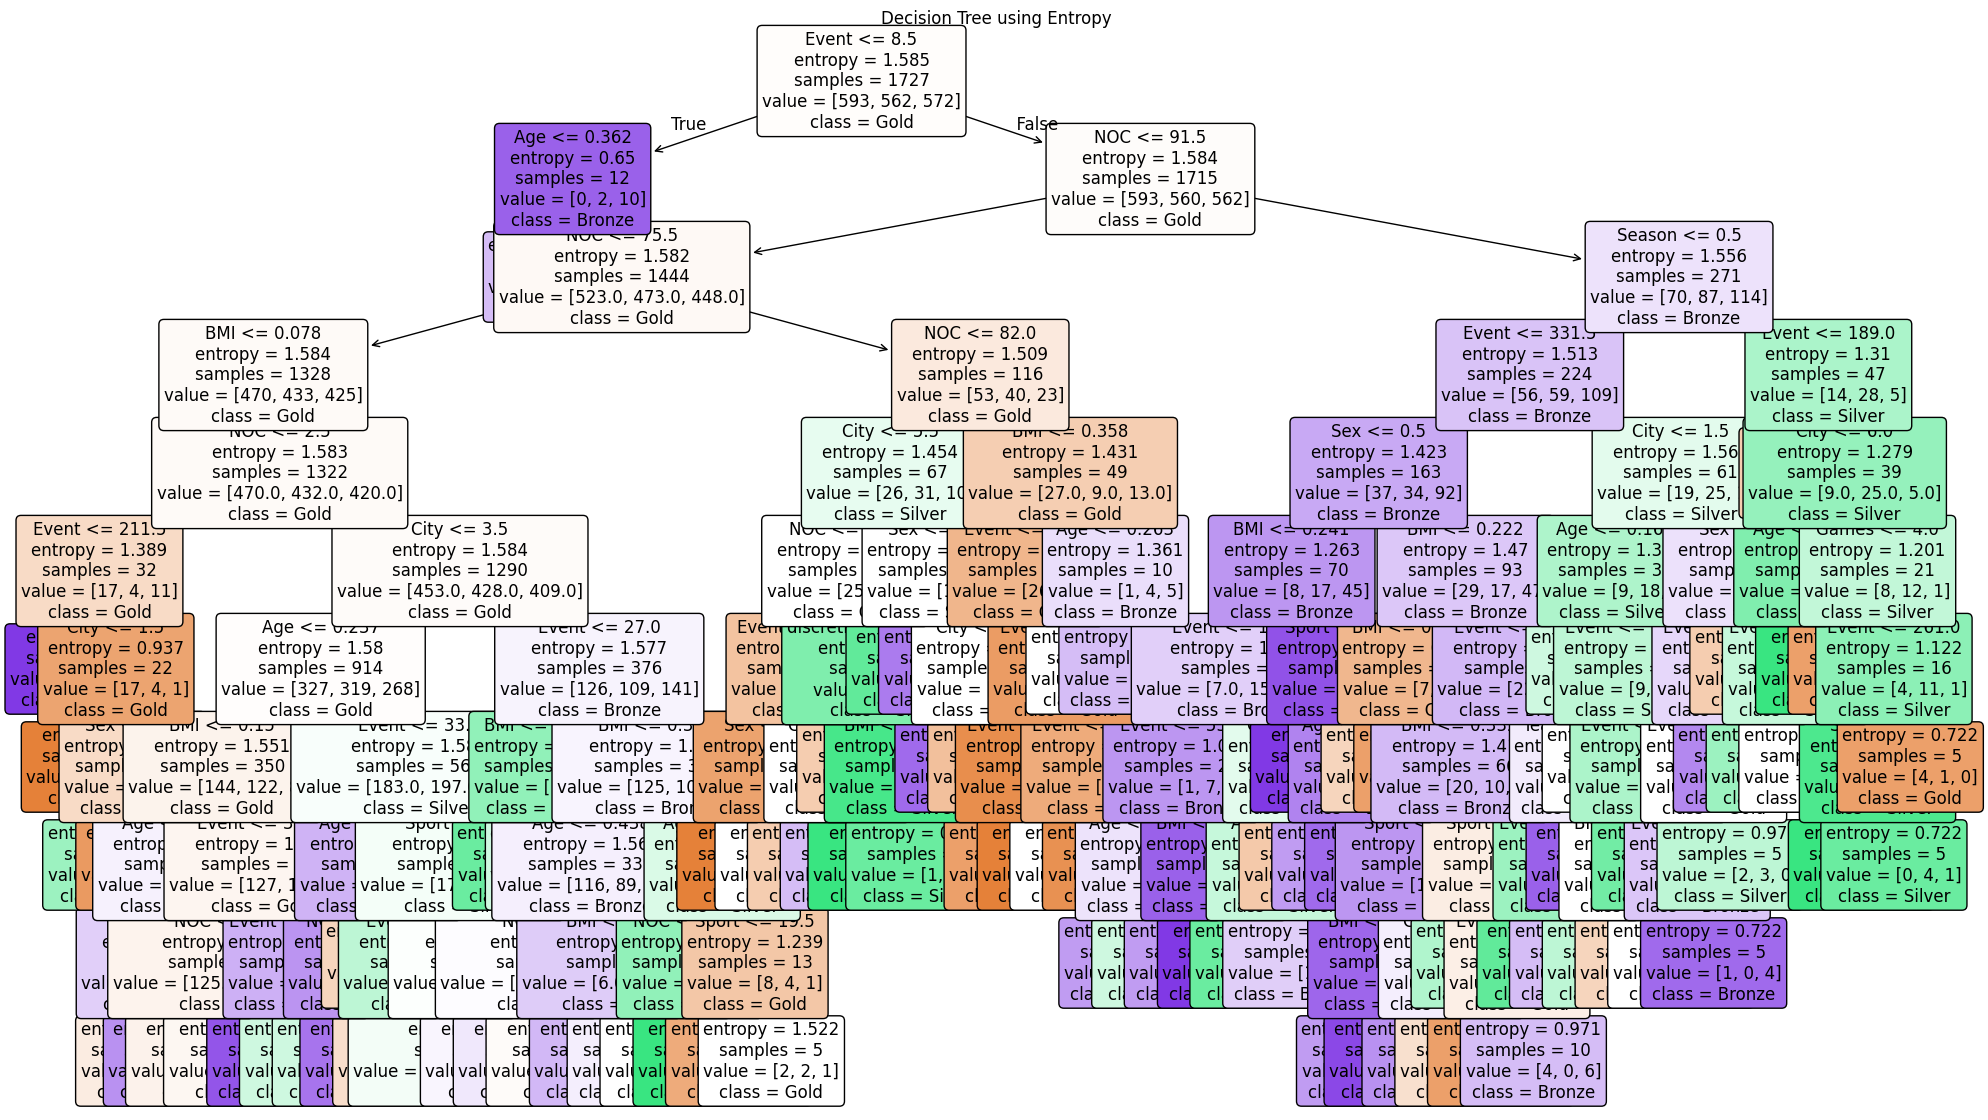

In [ ]:
# Splitting the data into 60% training / 40% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Training with hyperparameters using entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=10, min_samples_split=10, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

# Prediction
y_pred_entropy = clf_entropy.predict(X_test)

# Performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred_entropy))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_entropy))
print("Classification Report:\n", classification_report(y_test, y_pred_entropy))

# Confusion Matrix Figure
cm = confusion_matrix(y_test, y_pred_entropy)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Gold', 'Silver', 'Bronze'], yticklabels=['Gold', 'Silver', 'Bronze'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Decision Tree Figure
plt.figure(figsize=(24, 14))
plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=['Gold', 'Silver', 'Bronze'], rounded=True, fontsize=12)
plt.title('Decision Tree using Entropy')
plt.show()


#### 2. Data Partitioned into 70% training / 30% testing

Accuracy: 0.3819444444444444
Confusion Matrix:
 [[138  37 101]
 [152  65  82]
 [117  45 127]]
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.50      0.40       276
           1       0.44      0.22      0.29       299
           2       0.41      0.44      0.42       289

    accuracy                           0.38       864
   macro avg       0.40      0.39      0.37       864
weighted avg       0.40      0.38      0.37       864



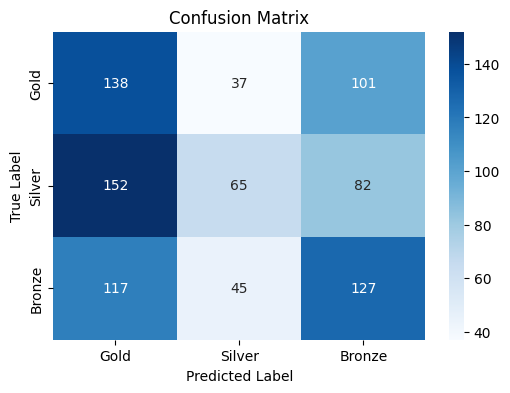

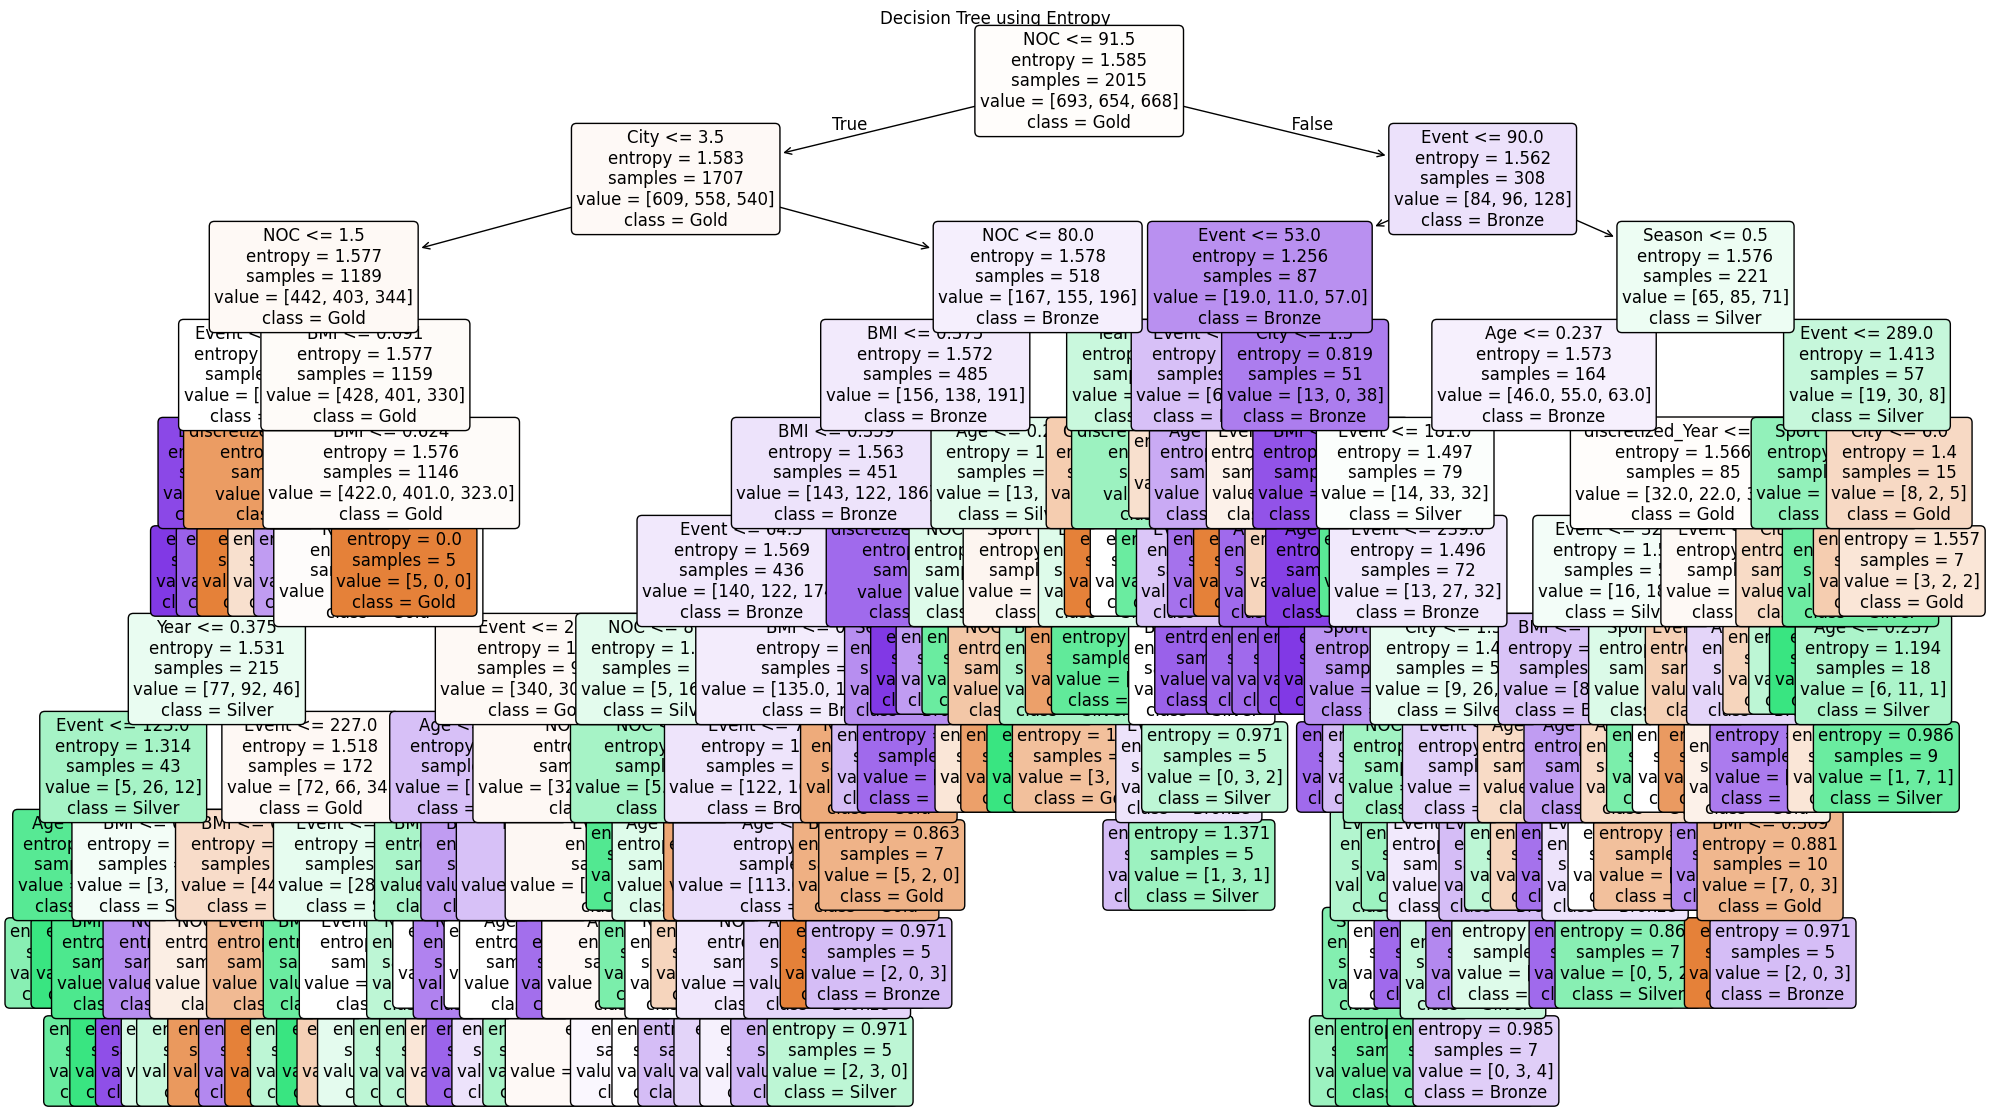

In [ ]:
# Splitting the data into 70% training / 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training with hyperparameters using entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=10, min_samples_split=10, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

# Prediction
y_pred_entropy = clf_entropy.predict(X_test)

# Performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred_entropy))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_entropy))
print("Classification Report:\n", classification_report(y_test, y_pred_entropy))

# Confusion Matrix Figure
cm = confusion_matrix(y_test, y_pred_entropy)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Gold', 'Silver', 'Bronze'], yticklabels=['Gold', 'Silver', 'Bronze'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Decision Tree Figure
plt.figure(figsize=(24, 14))
plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=['Gold', 'Silver', 'Bronze'], rounded=True, fontsize=12)
plt.title('Decision Tree using Entropy')
plt.show()

#### 3. Data Partitioned into 80% training / 20% testing


Accuracy: 0.4461805555555556
Confusion Matrix:
 [[ 55  90  38]
 [ 29 135  35]
 [ 36  91  67]]
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.30      0.36       183
           1       0.43      0.68      0.52       199
           2       0.48      0.35      0.40       194

    accuracy                           0.45       576
   macro avg       0.45      0.44      0.43       576
weighted avg       0.45      0.45      0.43       576



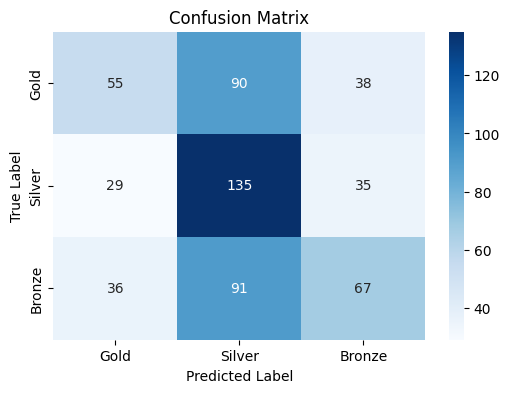

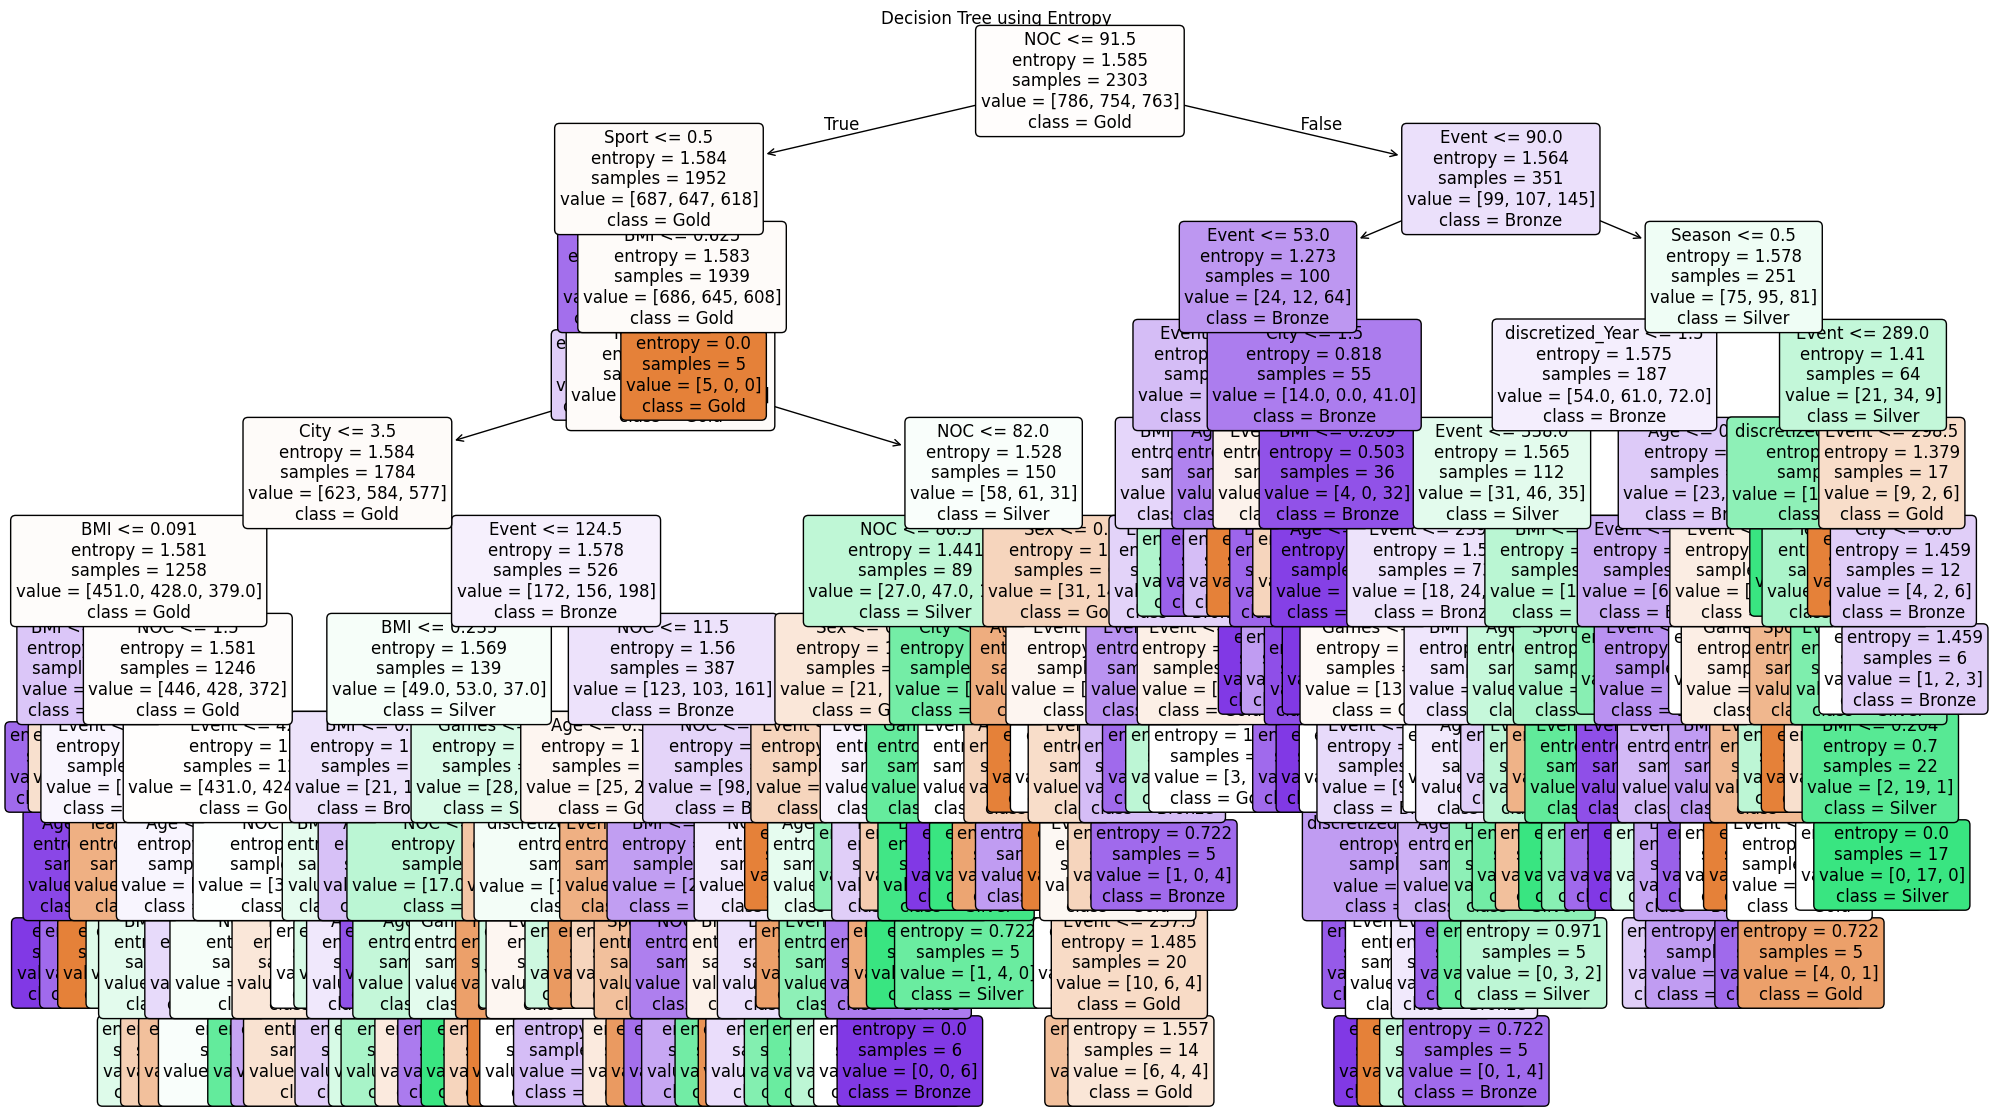

In [ ]:

# Splitting the data into 80% training / 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training with hyperparameters using entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=10, min_samples_split=10, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

# Prediction
y_pred_entropy = clf_entropy.predict(X_test)

# Performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred_entropy))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_entropy))
print("Classification Report:\n", classification_report(y_test, y_pred_entropy))

# Confusion Matrix Figure
cm = confusion_matrix(y_test, y_pred_entropy)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Gold', 'Silver', 'Bronze'], yticklabels=['Gold', 'Silver', 'Bronze'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Decision Tree Figure
plt.figure(figsize=(24, 14))
plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=['Gold', 'Silver', 'Bronze'], rounded=True, fontsize=12)
plt.title('Decision Tree using Entropy')
plt.show()

**First Partition (60/40)**

*  Accuracy: 41.5%

*  Recall:
It varies across classes. Class 0 (gold) performs the best, but even it is missing many true instances. Class 1 (silver) and Class 2 (bronze) also show moderate performance, indicating that the model has difficulty identifying instances for all classes. This suggests challenges in feature representation or potential class overlap.

*   Precision:
The precision scores reveal issues with false positives. Class 0 (gold) has the lowest precision, meaning many of its predictions are incorrect. Class 2 (bronze) shows the highest precision, indicating that when it is predicted, it is often correct, but its lower recall shows it is not being identified frequently. Overall, the precision scores highlight a need for improvements to reduce incorrect predictions across all classes.

*   F1 Scores:
The F1 scores indicate a need for improvement in balancing precision and recall. While Class 0 (gold) performs moderately, the overall performance across classes is suboptimal, suggesting areas for enhancement.


**Second Partition (70/30)**


*   Accuracy:38.1%

*   Recall:
Recall shows varied performance. Class 0 (gold) improves in detection, while Class 1 (silver) experiences a significant drop. Class 2 (bronze) maintains moderate recall. The improvement for Class 0 (gold) is promising, but the decline for Class 1 (silver) raises concerns about its representation in the training data.

*   Precision:
Precision scores are generally lower than in the first partition, indicating an increase in false positives, particularly for Class 0 (gold). This suggests that while some predictions are correct, many are not, affecting overall reliability.

*   F1 Scores:
The F1 scores reflect challenges for Class 1 (silver), which shows significant issues. This indicates an imbalance in the model's performance, highlighting the need for focused improvements for this class.

**Third Partition (80/20)**

*   Accuracy:44.6%

*   Recall:
Recall results are mixed. Class 1 (Silver) shows substantial improvement, indicating that the model has learned to identify this class effectively. However, Class 0 (Gold) experiences a decline, suggesting that the model may be prioritizing certain classes over others.


*   Precision:
Precision scores improve overall, especially for Class 1 (Silver), indicating that the model is more likely to be correct when predicting this class. However, the drop in recall for Class 0 (Gold) raises concerns about the balance in predictions.

*   F1 Scores:
The F1 scores vary across classes, with Class 1 (silver) achieving a better balance between precision and recall. However, Class 0 (Gold) still needs improvement, reflecting the model's inconsistent performance across different classes.








**Conclusion**

Across the three partitions, the model exhibits varying performance in accuracy, recall, precision, and F1 scores. Class 0 (gold) shows moderate recall but struggles with overall accuracy in the first partition. Class 1 (silver) faces significant challenges in the second partition but improves in the third. While larger training sets appear beneficial, targeted efforts are essential to ensure balanced performance and enhance detection capabilities, particularly for Class 0 (Gold) and Class 2 (Bronze). Further refinement of model parameters and feature representation will be crucial for improving overall classification effectiveness.

| Entropy                        |   60% training/40% testing   |   70% training/30% testing   |   80% training/20% testing   |
|----------------------------------|------------------------------|------------------------------|------------------------------|
| Accuracy                        | 41.5%                        | 38.1%                        | 44.6%                        |
| Confusion Matrix                | [[172 129  75] <br> [158 165  68] <br> [147  96 142]] | [[138  37 101] <br> [152  65  82] <br> [117  45 127]] | [[ 55  90  38] <br> [ 29 135  35] <br> [ 36  91  67]] |


## 6.2 **Clustering**
Clustering is a machine learning technique used to divide data into groups or clusters, where data points within each group are as similar as possible and as different as possible from those in other groups. Clustering aims to uncover patterns or structures within the data without the need for supervision or prior classification.


**We will aim to find the optimal number of clusters based on majority rule.**


before applying clustering, we will also remove the "Name" column, since we have IDs for players, we will not need the names, we also need to eliminate that column for when we apply clustering.

In [ ]:
df.drop(columns=["Name",'ID','Medal'], inplace=True)

In [ ]:
print(df)

       Sex       Age  NOC  Games   Year  Season  City  Sport  Event       BMI  \
40       1  0.351351   28      7  0.875       1     5     21    158  0.311567   
73       1  0.405405   61      1  0.125       1     4      0      4  0.374202   
76       1  0.405405   61      1  0.125       1     4      0      0  0.374202   
78       1  0.513514   61      3  0.375       1     7      0      4  0.374202   
79       0  0.324324   61      4  0.500       0     1     19    155  0.258046   
...    ...       ...  ...    ...    ...     ...   ...    ...    ...       ...   
69777    1  0.513514   32      3  0.375       1     7      7     62  0.273890   
69835    1  0.189189   88      2  0.250       0     0     40    274  0.259433   
69912    0  0.432432   32      0  0.000       0     6     15    132  0.198646   
69983    0  0.162162   62      8  1.000       0     3     28    197  0.350925   
69988    1  0.324324   88      1  0.125       1     4     35    227  0.292151   

       discretized_Year  
4

## 6.2.1 Apply K-means clustering
We used the k-means algorithm on the Olympics dataset, transforming the features into numeric values and removing the class label. This enabled us to perform effective clustering, revealing patterns and relationships within the data. These insights are crucial for understanding the factors that influence Olympic performance and for creating improved strategies for athletes and sports management.

We chose the number of clusters k randomly which are k=2, 3, 4, 5, and 6.

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import tree

## 6.2.2 Visualizing Clusters

For n_clusters = 2 The average silhouette_score is : 0.20602434212986576
For n_clusters = 3 The average silhouette_score is : 0.15204058684518648
For n_clusters = 4 The average silhouette_score is : 0.14590392942056069
For n_clusters = 5 The average silhouette_score is : 0.17437082680762703
For n_clusters = 6 The average silhouette_score is : 0.17752261311217363


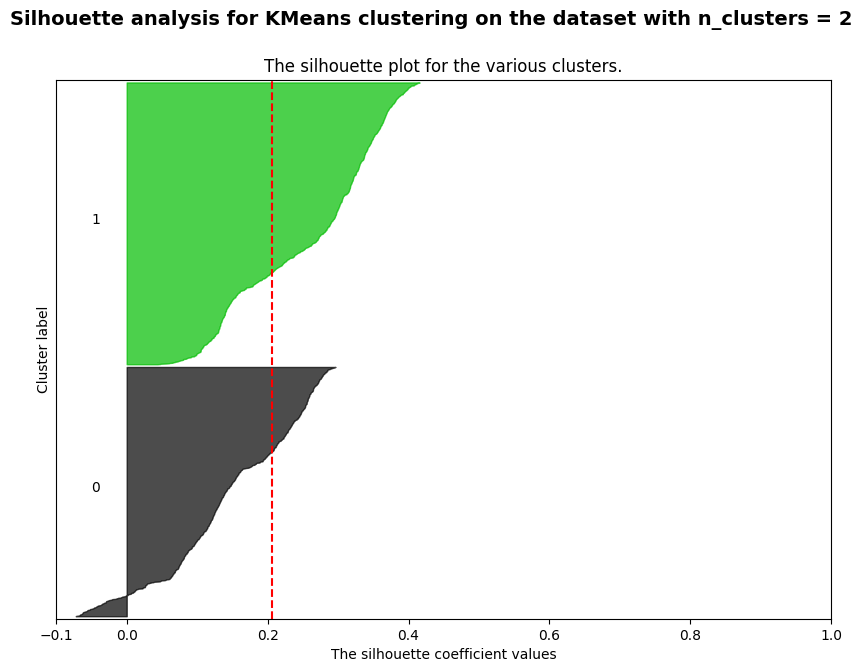

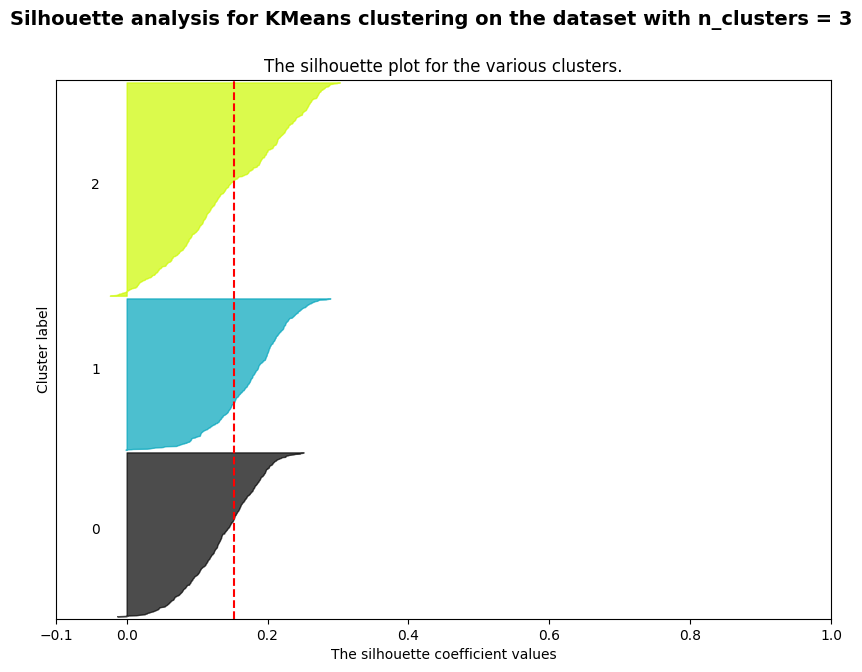

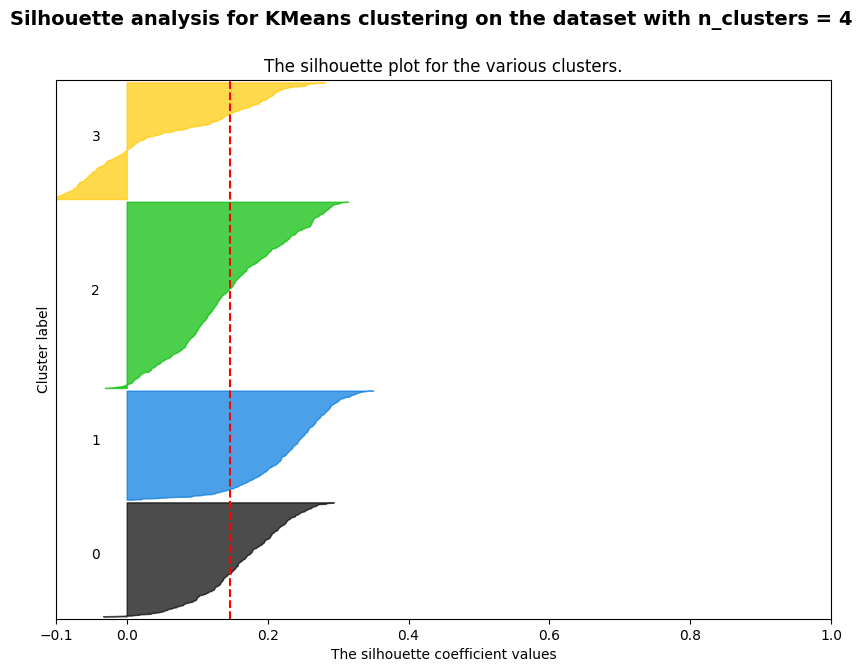

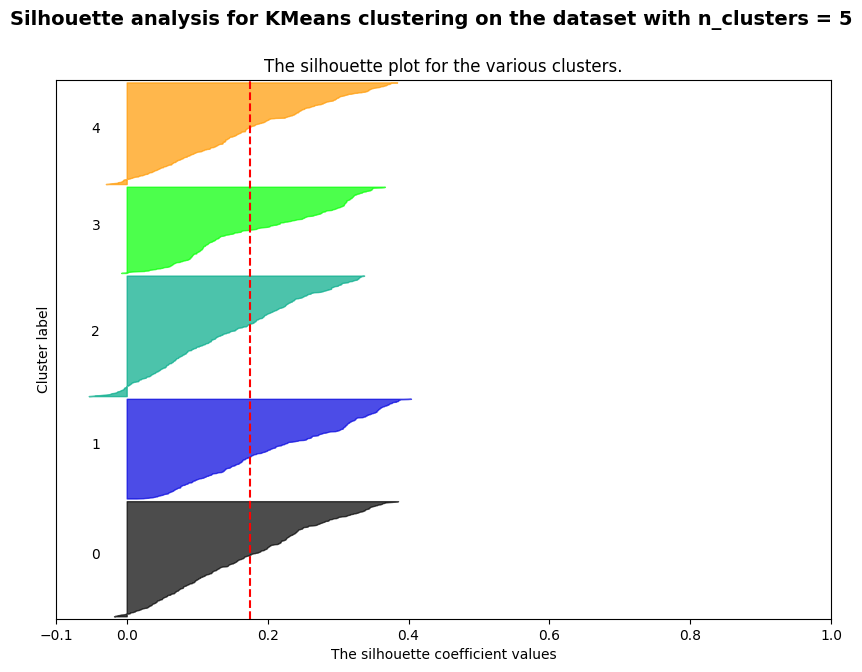

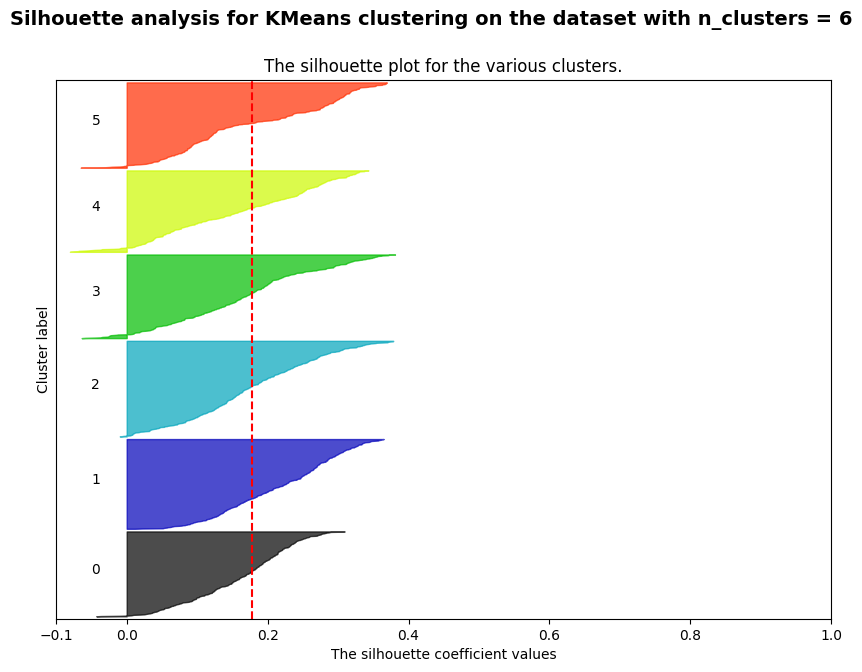

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler



# Standardize the data (important for KMeans clustering)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# List of K values you want to evaluate
range_n_clusters = [2, 3, 4, 5, 6]

# Iterate through the different cluster sizes (K)
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 1 column (only the silhouette plot)
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(10, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_scaled)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the y-axis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(f"Silhouette analysis for KMeans clustering on the dataset with n_clusters = {n_clusters}",
                 fontsize=14, fontweight="bold")

plt.show()


We can see that after checking the silhouette scores for each of the different clusters, that the best amount of clusters is either **2 clusters**, we say this because it has the highest average silhouette score, as well as it not having any negative values like the other clusters, all other clusters have negative values.

However, we can also say that the **6 clusters** is also very good, it has a high score, and very few negative values, so we will keep it into consideration

## 6.2.3 Calculating the WCSS for each cluster.

WCSS (Within-Cluster Sum of Squares) measures the compactness of the clusters. Specifically, it is the sum of squared distances between each data point in a cluster and the centroid of that cluster. It quantifies how close the points within each cluster are to their respective centroids.

Then, Lower WCSS = Better Clusters.


In [ ]:
# Loop over different cluster sizes
for n_clusters in range_n_clusters:
    # Fit KMeans model with the current value of n_clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=8953)
    kmeans.fit(df_scaled)

    # Calculate the Total Within-Cluster Sum of Squares (WCSS)
    wcss = kmeans.inertia_  # Using inertia_ which gives the total WCSS directly

    # Print the WCSS for the current number of clusters
    print(f"WCSS for {n_clusters} clusters: {wcss}")


WCSS for 2 clusters: 18605.6982385088
WCSS for 3 clusters: 16518.273184049667
WCSS for 4 clusters: 14413.056072173797
WCSS for 5 clusters: 13183.92707742725
WCSS for 6 clusters: 11940.061010439995


We can see for the WCSS that the lowest value is for 6 clusters, and the highest is for 2 clusters, indicating that **6 clusters** are the best, and **2 clusters** are the worst.


## 6.2.4 Optimal number of clusters:
so far, we have checked both Silhouette scores and WCSS, and had a general idea about the optimal number of clusters.


now for justifying the choice of the number of clusters k in k-mean we will use The elbow method and average silhouette method. they are also used to find the optimal number of clusters in a k-means clustering algorithm.


### Elbow method:

Elbow method with the Within-Cluster Sum of Squares (WSS) to find the optimal number of clusters in a k-means clustering algorithm.

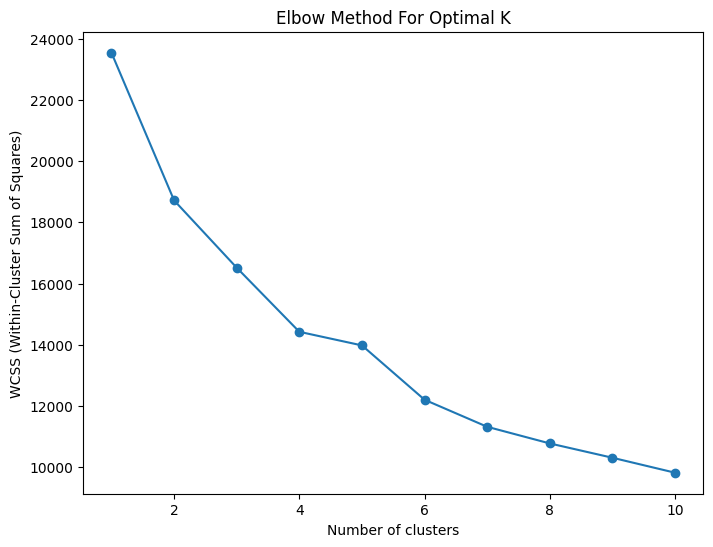

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming your dataframe is df and the relevant features are selected

# Calculate WCSS for different values of K (e.g., from 1 to 10)
wcss = []
for k in range(1, 11):  # K=1 to K=10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)  # Use the scaled data (df_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


We notice that the graph flattens at **6 clusters**, meaning that the value on the left decreases slower when it reaches 6.

let us check out the silhouette method and see what output it will offer to us.

### Average silhouette method:


The silhouette method helps understand the quality of clustering by measuring how similar an object is to its own cluster compared to other clusters. The optimal number of clusters is often associated with a high average silhouette score.

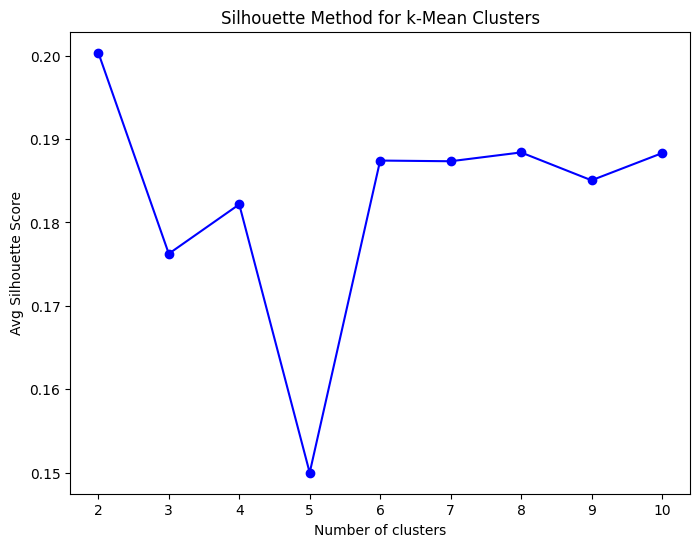

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Calculate Silhouette Scores for different values of K (e.g., from 2 to 10)
silhouette_scores = []
for k in range(2, 11):  # K=2 to K=10
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)  # Use the scaled data
    score = silhouette_score(df_scaled, cluster_labels)  # Calculate the silhouette score
    silhouette_scores.append(score)

# Plot the Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='b')
plt.title('Silhouette Method for k-Mean Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Avg Silhouette Score')
plt.show()


According to the graph above, 2 clusters is the highest, after it comes 6 clusters.


but we also saw the elbow method showing that 6 clusters is the optimal, when we check out 6 in the silhouette graph, we can see that the score between 2 and 6 aren't too different or distinct from each other (18-21).



## Conclusion and choice of amount of clusters:

at this point, we are between 2 and 6 clusters, generally, 6 clusters seems like a good choice for the following reasons:

- High silhouette score.
- Very few negative values in silhouette score.
- Lowest WCSS value.
- Elbow method indication.
- Results in silhouette method are not too bad.

Summary output for each method:

| Method                                        | K = 2 | K = 3 | K = 4 | K = 5 | K = 6 |
|-----------------------------------------------|-------|-------|-------|-------|-------|
| Silhouette Method                             | 0.206 | 0.152 | 0.145 | 0.174 | 0.177 |
| Total within-cluster sum of squares          | 18605 | 16518 | 14413 | 13183 | 11940 |



Best on **majority rule**, the best amount of clusters is 6.

# 7. Findings


## 7.1 Classification And Clustering Analysis

In this section, findings are presented from analyses aimed at identifying the factors influencing Olympic athletes' chances of winning gold, silver, or bronze medals. Classification and clustering techniques, including decision trees and various clustering methods, are utilized to uncover the key contributors to medal achievements and evaluate the effectiveness of these approaches.

### 7.1.1 Evaluation of classification Result

For classification, we used decision trees with Gini Index and Information Gain
(Entropy) as splitting criteria, comparing their performance across three dataset
partitions: 70%-30%, 80%-20%, and 90%-10% splits. The following tables summarize
the results.

**Accuracy And Confusion Matrics Metrics**



|                Metric             |   60% training/40% testing   |   70% training/30% testing   |   80% training/20% testing   |
|-----------------------------------|------------------------------|------------------------------|------------------------------|
| **IG**                            |                              |                              |                              |
| Accuracy                          | 39.5%                        | 40.6%                        | 41.67%                       |
| Confusion Matrix                  | [[293  17  66] <br> [283  59  49] <br> [251  31 103]] | [[159  37  80] <br> [164  68  67] <br> [129  36 124]] | [[ 36 107  40] <br> [ 23 145  31] <br> [ 35 100  59]] |
| **Entropy**                        |                              |                              |                              |
| Accuracy                          | 41.5%                        | 38.1%                        | 44.6%                        |
| Confusion Matrix                  | [[172 129  75] <br> [158 165  68] <br> [147  96 142]] | [[138  37 101] <br> [152  65  82] <br> [117  45 127]] | [[ 55  90  38] <br> [ 29 135  35] <br> [ 36  91  67]] |



**Discussion Of Results**

---



 **Accuracy Comparison**

For the IG algorithm, the best performance is observed in the 70% training / 30% testing partition. In contrast, the Entropy algorithm performs best in the 60% training / 40% testing and 80% training / 20% testing partitions. Among all configurations, the Entropy algorithm achieves the highest overall accuracy of 44.6%, recorded in the 80% training / 20% testing partition.

**Conclusion** Overall, the Entropy algorithm outperforms IG due to its higher accuracy (44.6%) and more consistent performance across the majority of partitions.

**Best Partition And Criteria**


**Partition Overview**
1.   60% Training / 40% Testing
* **Characteristics**:
Larger test set (40%), providing a robust evaluation of the model’s generalization to unseen data.
Relatively smaller training set (60%), which may lead to underfitting if the training data is insufficient.
* **Performance**:
Entropy achieves the best accuracy (41.5%) in this partition.
Higher sensitivity, specificity, and precision across most classes compared to IG.
***Implications**:
This partition is ideal if a larger test set is needed to reliably estimate real-world performance.
However, the smaller training size might limit the model’s ability to learn complex patterns.




---


2.   70% Training / 30% Testing
* **Characteristics**:
Balanced split between training (70%) and testing (30%).
Larger training set compared to the 60/40 partition, enabling better learning of patterns in the data.
Moderate test set size ensures reasonable evaluation reliability.
* **Performance**:
IG performs better in this partition with an accuracy of 40.6%.
IG shows improved precision and sensitivity for Class 1 and Class 2 compared to Entropy.
***Implications**:
This partition strikes a good balance between training and testing sizes, making it a strong choice for general-purpose evaluations.
It is ideal when the model requires sufficient training data without compromising the reliability of testing.



---




3.  80% Training / 20% Testing
* **Characteristics**:
Largest training set (80%), providing the best opportunity for the model to learn from the data.
Smaller test set (20%), which may slightly reduce the reliability of the evaluation.
* **Performance**:
Entropy achieves the best overall accuracy (44.6%) in this partition.
Higher sensitivity, specificity, and precision for most classes compared to IG.
***Implications**:
This partition is best when the focus is on maximizing model learning and minimizing errors in predictions, as the larger training set often leads to better performance.
However, the smaller test set size may introduce variability in the evaluation metrics.




**Best Partition**

The 80% Training / 20% Testing partition emerges as the best configuration based on the following criteria:


1.   **Highest Accuracy**: The Entropy algorithm achieves the highest accuracy (44.6%) in this partition, outperforming IG and its own performance in other partitions.
2.  **Consistent Performance**: Both IG and Entropy exhibit improved metrics (sensitivity, specificity, and precision) in this partition due to the larger training size.

3.   **Maximized Learning**: The larger training set (80%) ensures the model has ample data to learn patterns, minimizing underfitting.




**Criteria for Choosing a Partition**

The choice of the best partition depends on the application’s specific goals:


1.   **Generalization to Unseen Data:** If testing on a larger, more diverse dataset is critical, the 60%/40% partition is preferable as it has the largest test set.
2.   **Balanced Approach:** For applications requiring a balance between training and testing, the 70%/30% partition is ideal. It provides sufficient training data while still testing the model on a moderately sized dataset.
3.  **Maximizing Accuracy and Learning:** If the goal is to maximize model performance (e.g., for critical applications like medical diagnosis or fraud detection), the 80%/20% partition is the best option. It allows the model to learn effectively from the largest training set and demonstrates the highest accuracy.




**Conclusion**

The 80%/20% partition is the best choice overall because it enables the model to achieve the highest accuracy and perform consistently across most metrics. However, the final decision on the partition should consider the application-specific requirements, such as the importance of testing reliability versus maximizing learning.








### 7.1.2 Evaluation Of Clustring Results

For clustering, K-means analysis was employed to gain insights into the For clustering, K-means analysis was employed to gain insights into the underlying structure of the dataset. By testing three different cluster configurations ( k=2, 3, 4, 5, and 6.), it was possible to observe how the dataset's features grouped in various scenarios and how the quality of clustering changed across these configurations.

| Method                                        | K = 2 | K = 3 | K = 4 | K = 5 | K = 6 |
|-----------------------------------------------|-------|-------|-------|-------|-------|
| Silhouette Method                             | 0.206 | 0.152 | 0.145 | 0.174 | 0.177 |
| Total within-cluster sum of squares          | 18605 | 16518 | 14413 | 13183 | 11940 |


**Metrics**:
 * **WCSS**
  * for 2 clusters: 18605.6982385088
  * for 3 clusters: 16518.273184049667
  * for 4 clusters: 14413.056072173797
  * for 5 clusters: 13183.92707742725
  * for 6 clusters: 11940.061010439995

   the lowest value is for 6 clusters, and the highest is for 2 clusters, indicating that 6 clusters are the best, and 2 clusters are the worst.
 * **Sillhouette score**
  * For 2 clusters : 0.20602434212986576
  * For 3 clusters : 0.15204058684518648
  * For 4 clusters : 0.14590392942056069
  * For 5 clusters : 0.17437082680762703
  * For 6 clusters : 0.17752261311217363

   the best amount of clusters is either 2 clusters, we say this because it has the highest average silhouette score, as well as it not having any negative values like the other clusters, all other clusters have negative values.

However, we can also say that the 6 clusters is also very good, it has a high score, and very few negative values, so we will keep it into consideration








*   **Interpretion**
2 clusters offer the best separation between groups with the highest Silhouette Score (0.206). 6 clusters minimize WCSS (11940.06), providing tighter grouping and good separation, making it a balanced choice.

*   **Cluster Visualization**

 that the best amount of clusters is either 2 clusters, we say this because it has the highest average silhouette score, as well as it not having any negative values like the other clusters, all other clusters have negative values.




**Optimal K**

The Elbow Method suggests 6 clusters as the optimal choice, where WCSS flattens, balancing compactness and simplicity. For K = 2 to 5, WCSS decreases sharply, indicating better compactness but likely underfitting the data. For K = 7 to 10, the WCSS reduction becomes minimal, adding unnecessary complexity. Thus, 6 clusters provide the best trade-off between performance and simplicity.

### 7.1.3 Clustering vs Classification

**Clustering Accuracy**


Clustering was evaluated using the Silhouette Score and Within-Cluster Sum of Squares (WCSS):
* The highest Silhouette Score is 0.206 for 2 clusters, indicating moderate separation and cohesion between clusters.


* For 6 clusters, the Silhouette Score is 0.177, with the lowest WCSS (11940), showing better compactness within clusters but limited separation.

Overall, the Silhouette Scores are relatively low, indicating that clustering does not achieve highly cohesive or well-separated groupings.
Clustering provides insights into the dataset’s structure but does not offer explicit predictive accuracy, as it is an unsupervised method.

**Classification Accuracy**

Classification was evaluated using metrics like accuracy, sensitivity, specificity, and precision:
* The Entropy algorithm achieves the highest accuracy of 44.6% in the 80% training / 20% testing partition.
* Additional metrics like sensitivity and precision provide detailed insights into class-wise performance, ensuring the results are actionable and interpretable.

Unlike clustering, classification provides a measurable and direct accuracy score, which represents the percentage of correct predictions.

**Conclusion**

Classification outperforms clustering with a highest accuracy of 44.6%, providing clear and interpretable performance. Clustering, while useful for exploring data structure, lacks comparable accuracy due to its unsupervised nature and low Silhouette Scores. The best classification configuration is the Entropy algorithm with 80% training / 20% testing, achieving the highest accuracy (44.6%) and strong overall performance. This setup balances effective training and reliable predictions, making it ideal for precision tasks.

---



### 7.2 Solution To Our Problem



**Final decision Tree Analysis**

We will visualize the decision tree for the 80%-20% data split based on Entropy criteria, then we will extract insights about feature importance and interpret how they contribute to the medals achieved. 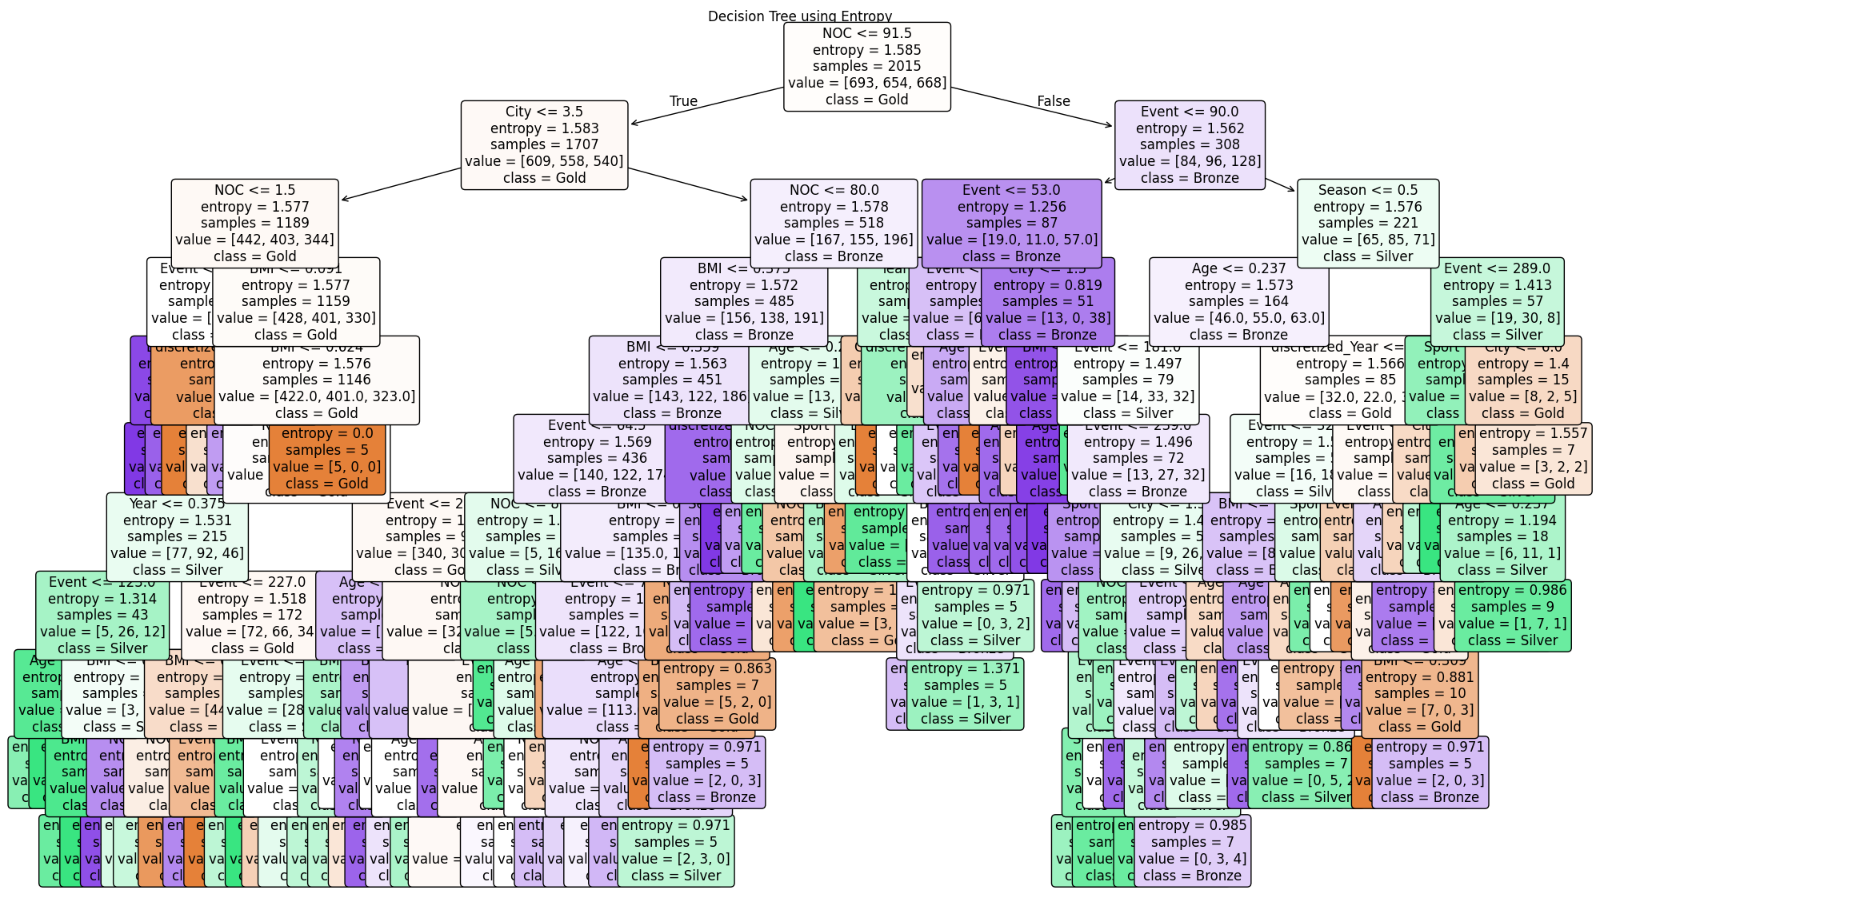

### 7.2.1 Decision Tree Analysis


1.**Root Node**
* Condition: City <= 3.5
* Entropy: 1.583
* Samples: 2,015
* Value: [693, 654, 668]
* Class: Gold

This is the starting point of the decision tree, where the dataset is split into two branches based on the City <= 3.5 condition.


---

2. **Left Branch (True)**
* Condition: NOC <= 1.5
* Entropy: 1.577
* Samples: 1,189
* Value: [442, 403, 344]
Class: Gold

**Sub-Branches of Left:**

  1. Left Sub-Branch (True): Event <= 1.5

Further splits based on other attributes like BMI, Year, and Event, continuing to refine decisions.

 2. Right Sub-Branch (False): Event > 1.5

Similar detailed splits with refined entropy, sample counts, and class decisions.


---

3. **Right Branch (False Condition)**

* Condition: NOC <= 91.5
* Entropy: 1.585
* Samples: 826
* Value: [84, 96, 128]
* Class: Bronze


**Sub-Branches of the Right Branch:**

  1. Left Sub-Branch (True Condition: NOC <= 91.5)

    * Condition: Event <= 53.0

    * Entropy: 1.562

    * Samples: 518

    * Value: [167, 155, 196]

    * Class: Bronze
This branch further splits into sub-branches refining decisions about Season, Age, and other attributes.

  2. Right Sub-Branch (False Condition: NOC > 91.5)

Leads to further splits and eventually terminal nodes.



### 7.2.2 Decision Tree Summary



**Key Observations**
1. **Dominant Features**:

* The decision tree prioritizes City, NOC, Event, and BMI as the most influential attributes for classification.
These features appear higher in the tree, indicating their strong predictive power.

2. **Majority Class**:

* At the root node, Gold is the majority class with 609 instances out of 2,015 samples. This suggests that Gold is the most frequent category overall.

3. **Branch Splits**:

* The left branch (City <= 3.5) predominantly leads to Gold and Silver classifications.
The right branch (City > 3.5) mostly results in Bronze classifications.

4. **Terminal Nodes**:
* The tree ends in terminal nodes with pure or near-pure classifications (low entropy), such as:
Entropy = 0: Pure nodes, like one branch leading to Gold with [5, 0, 0].
Other nodes maintain a mix but are skewed toward a dominant class.


---


**Critical Points**

1.**City Feature Importance**:
   * The root node split on City <= 3.5 is critical as it significantly reduces entropy, separating the data into groups dominated by Gold and Bronze.

2.**Event and NOC Features**:
  * Attributes like Event and NOC further refine the splits effectively, indicating their relevance in determining the class.

3.**Imbalanced Class Distribution**:
   * While Gold is the majority class, Bronze and Silver are less represented in some branches, potentially leading to bias.

4.**Entropy Reduction**:
  * Some splits lead to very low entropy and pure classifications, but others maintain relatively high entropy, suggesting opportunities to improve splitting criteria.


---
**Solutions and Recommendations**
1. **Feature Engineering**:

* Analyze the less impactful features (e.g., Age, Season) and consider engineering new attributes or combining existing ones to enhance the splits and reduce entropy.
2. **Pruning**:

* The tree contains several deep splits with marginal reductions in entropy. Pruning such branches could simplify the tree and prevent overfitting.
3. **Class Imbalance**:

* Address imbalanced classes by using techniques like oversampling, undersampling, or weighted classification to improve representation of minority classes.
4. **Validation and Cross-Validation**:

* Evaluate the model's performance on separate validation datasets or through cross-validation to ensure the decision tree generalizes well to unseen data.
5. **Visualization Insights**:

* Use the insights from the tree to identify key decision points (e.g., City, NOC) and prioritize them in business or operational strategies.




# 8. Refrences
[1] LakeFS, "Data Preprocessing in Machine Learning," LakeFS, [Online]. Available: https://lakefs.io/blog/data-preprocessing-in-machine-learning/. [Accessed:10-Oct-2024].

[2] GeeksforGeeks, "Supervised vs Unsupervised Learning," GeeksforGeeks, [Online]. Available: https://www.geeksforgeeks.org/supervised-unsupervised-learning/. [Accessed:30-Oct-2024].

[3] GeeksforGeeks, "Basic Concept of Classification in Data Mining," GeeksforGeeks, [Online]. Available: https://www.geeksforgeeks.org/basic-concept-classification-data-mining/. [Accessed:30-Oct-2024].
